# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.cluster import KMeans

from IPython.display import clear_output
import time

from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import PolynomialFeatures as pf, StandardScaler as ss, MinMaxScaler as mms
from sklearn.metrics import r2_score

import sys

In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')

import warnings
warnings.simplefilter('ignore')

In [3]:
colors = ['orange', 'darkblue', 'yellow', 'darkred', 'darkgreen', 'purple', 'lightgreen', 'pink', 'black', 'lightblue']*7     # Colors to differentiate clusters

# Loading Data

In [18]:
data_path = '\\Users\luisr\Desktop\Repository\Data-Science-Projects\Data_Science_Projects\Clusters Demográficos e Econômicos de Bairros do Rio de Janeiro\Data\Final Data\\gym_neighborhood_data.csv'

data = pd.read_csv(data_path)

In [ ]:
#data = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Final Data\\gym_neighborhood_data.csv')

# Feature Engineering

In [24]:
data['adult pop'] = data[data.columns.tolist()[23:29]].sum(axis=1)

data['adult_pop/Km2'] = data['adult pop'] / data['Km2']

In [25]:
cols = data.columns.tolist()

In [26]:
data.columns.tolist()[23:29]

['30 a 34 anos',
 '35 a 39 anos',
 '40 a 49 anos',
 '50 a 59 anos',
 '60 a 64 anos',
 '65 a 69 anos']

# Planning

### Data: 
    1. Foursquare Gyms
    2. População alvo (População)
    3. Area
    4. Renda Nominal media mensal ou massa salarial total (Renda)
    5. Estabelecimentos de industrias selecionadas (Comercio)
    6. Consumo de energia comercial e unidades (Comercio)    
    
### Anaylsis: 
    1. Clustering or thresholds to maximize or minimize 
    2. Regression or classification to understand what drives number of gyms

### Methodology:
    1. First, neighborhoods should be segmented by comerce, income and demographic factors
    2. Finaly, divide by gym competition.

# Feature Selection

## Income

In [27]:
income = data[['neighborhood']+[cols[40]]].set_index('neighborhood').copy()    # Include Total Salary

income[cols[38]+'/Km2'] = (data.set_index('neighborhood')[cols[38]] / data.set_index('neighborhood')['Km2']).to_frame()

income[cols[39]+'/Km2'] = (data.set_index('neighborhood')[cols[39]] / data.set_index('neighborhood')['Km2']).to_frame()

income_cols = cols[33:42]+[cols[38]+'/Km2', cols[39]+'/Km2']

In [28]:
[cols[38], cols[39], cols[40]]

['Pessoas com rendimento responsáveis pelos domicílios particulares permanentes',
 'Valor do rendimento total mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$)',
 'Valor do rendimento nominal médio mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$)']

In [29]:
income_cols[5:7]

['Pessoas com rendimento responsáveis pelos domicílios particulares permanentes',
 'Valor do rendimento total mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$)']

In [30]:
income.columns

Index(['Valor do rendimento nominal médio mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$)',
       'Pessoas com rendimento responsáveis pelos domicílios particulares permanentes/Km2',
       'Valor do rendimento total mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$)/Km2'],
      dtype='object')

# Population

In [31]:
pop = data[['neighborhood', 'adult pop', 'adult_pop/Km2', 'target pop', 'target_pop/Km2', 'Km2']].set_index('neighborhood').copy()

# Comerce

In [32]:
comerce_features = [ 'Comércio varejista_x',
                     'Instituições de crédito, seguros e capitalização_x',
                     'Comércio e administração de imóveis, valores mobiliários, serviços técnicos_x',
                     'Serviços de alojamento, alimentação, reparação, manutenção, redação..._x',
                     'Serviços médicos, odontológicos e veterinários_x',
                     'Ensino_x']

In [33]:
comerce = data[['neighborhood']+comerce_features].set_index('neighborhood').copy()

# 1. K-Means Clustering: Income

# 1.1 Optimization

### Case Equations

i ~ income
j ~ pop
k ~ Km2

x ~ income/pop
y ~ pop/Km2
z ~ income/Km2

1. x = i/j
2. y = j/k
3. z = i/k

i = x*j
z = x*j/k

4. z = xy
5. x = z/y
6. y = z/x

---

z = x * j/k

z = z**2 / x*y
z = i2/k2 /



---

7. i = a1 * j + b1
8. j = a2 * k + b2
9. k = a3 * i + b3

i = k/a3 - b3/a3

x = a1 + b1/j
y = a2 + b2/k
1/z = a3 + b3/i
z = 1/a3 - b3/a3 * (1/k)


x = (a1 * j + b1) / (a2*k + b2)
y = (a2 * k + b2) / (a3*i + b3)
z = (a1 * j + b1) / (a3*i + b3)



In [218]:
save_figs = False

colors = ['orange', 'darkblue', 'yellow', 'darkred', 'darkgreen', 'purple', 'lightgreen', 'pink', 'black', 'lightblue']*7     # Colors to differentiate clusters

income_log = income[income.columns[:3]].apply(np.log1p).fillna(0)
income_ss = ss().fit_transform(income_log)
income_mms = mms().fit_transform(income_log)

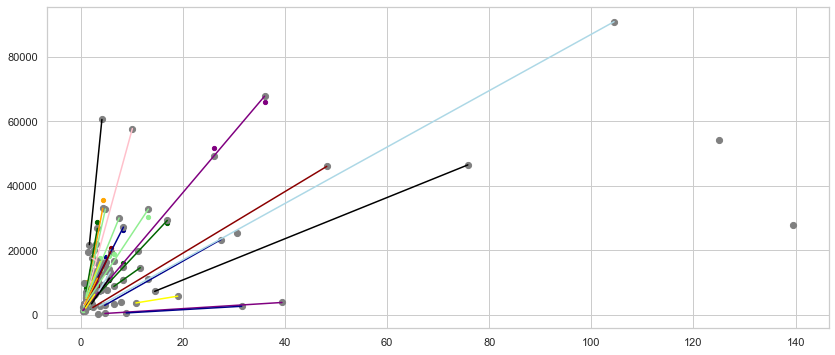

0
39 clusters


In [36]:
iis = data.set_index('neighborhood')[[income_cols[6]]]
js = data.set_index('neighborhood')[[income_cols[5]]]
ks = data.set_index('neighborhood')[['Km2']]

xs = income[[income.columns[0]]]
ys = income[[income.columns[1]]]
zs = income[[income.columns[2]]]

#---- Empty Lists

mode = input('Insert mode (dinamic or static):\n')
control = input('Insert variable to plot (ij, jk, ki, ji, kj, ik):\n')


scrs_dfs = []
vars_dfs = []

for a in range(1):

    inertia = []

    std_x = []
    std_y = []
    std_z = []
    var_x = []
    var_y = []
    var_z = []

    scrs_ij = []
    scrs_jk = []
    scrs_ki = []

    scrs_ji = []
    scrs_kj = []
    scrs_ik = []
    
    for n_clusters in range(1, 40):
    
        kmeans = KMeans(n_clusters=n_clusters, n_init=40).fit(income_ss)

        income['cluster'] = kmeans.labels_    
        clusters = income['cluster'].copy()
        sorted_clusters = income.groupby('cluster').mean().sort_values(by=income.columns[2]).index.tolist()
    
#--- Regression ------
    
        xs_i = [income[clusters==cluster][[income.columns[0]]] for cluster in sorted_clusters]
        ys_i = [income[clusters==cluster][[income.columns[1]]] for cluster in sorted_clusters]
        zs_i = [income[clusters==cluster][[income.columns[2]]] for cluster in sorted_clusters]

        iis_i = [data.set_index('neighborhood')[clusters==cluster][[income_cols[6]]] for cluster in sorted_clusters]
        js_i = [data.set_index('neighborhood')[clusters==cluster][[income_cols[5]]] for cluster in sorted_clusters]
        ks_i = [data.set_index('neighborhood')[clusters==cluster][['Km2']] for cluster in sorted_clusters]

        x1_i = [np.linspace(x.min(), x.max(), 200) for x in xs_i]
        y1_i = [np.linspace(y.min(), y.max(), 200) for y in ys_i]
        z1_i = [np.linspace(z.min(), z.max(), 200) for z in zs_i]

        ii1_i = [np.linspace(i.min(), i.max(), 200) for i in iis_i]
        j1_i = [np.linspace(j.min(), j.max(), 200) for j in js_i]
        k1_i = [np.linspace(k.min(), k.max(), 200) for k in ks_i]
   
    
        a1_i, b1_i = [], []
        a2_i, b2_i = [], []
        a3_i, b3_i = [], []
        a4_i, b4_i = [], []
        a5_i, b5_i = [], []
        a6_i, b6_i = [], []
    
        for i in range(len(sorted_clusters)):
            
            lr1 = lr().fit(js_i[i], iis_i[i])
        
            a1_i.append(lr1.coef_[0][0])
            b1_i.append(lr1.intercept_[0])
        
            lr2 = lr().fit(ks_i[i], js_i[i])
            
            a2_i.append(lr2.coef_[0][0])
            b2_i.append(lr2.intercept_[0])

            lr3 = lr().fit(iis_i[i], ks_i[i])
        
            a3_i.append(lr3.coef_[0][0])
            b3_i.append(lr3.intercept_[0])
    
            lr4 = lr().fit(iis_i[i], js_i[i])
        
            a4_i.append(lr4.coef_[0][0])
            b4_i.append(lr4.intercept_[0])
        
            lr5 = lr().fit(js_i[i], ks_i[i])
        
            a5_i.append(lr5.coef_[0][0])
            b5_i.append(lr5.intercept_[0])
        
            lr6 = lr().fit(ks_i[i], iis_i[i])
        
            a6_i.append(lr6.coef_[0][0])
            b6_i.append(lr6.intercept_[0])
        
        
#--- Predictions ------


        ij_pred = [a*j + b for a, b, j in zip(a1_i, b1_i, js_i)]
        jk_pred = [a*k + b for a, b, k in zip(a2_i, b2_i, ks_i)]
        ki_pred = [a*i+ b for a, b, i in zip(a3_i, b3_i, iis_i)]

        ji_pred = [a*i + b for a, b, i in zip(a4_i, b4_i, iis_i)]
        kj_pred = [a*j + b for a, b, j in zip(a5_i, b5_i, js_i)]
        ik_pred = [a*k + b for a, b, k in zip(a6_i, b6_i, ks_i)]

        if mode in ['dinamic', 'static']:
        
            ij_pred_grid = [a*j + b for a, b, j in zip(a1_i, b1_i, j1_i)]
            jk_pred_grid = [a*k + b for a, b, k in zip(a2_i, b2_i, k1_i)]
            ki_pred_grid = [a*i + b for a, b, i in zip(a3_i, b3_i, ii1_i)]

            ji_pred_grid = [a*i + b for a, b, i in zip(a4_i, b4_i, ii1_i)]
            kj_pred_grid = [a*j + b for a, b, j in zip(a5_i, b5_i, j1_i)]
            ik_pred_grid = [a*k + b for a, b, k in zip(a6_i, b6_i, k1_i)]



#---- Statistics ------
    
        std_x_row = [income[income['cluster']==cluster].std()[income.columns[0]] for cluster in sorted_clusters]
        std_y_row = [income[income['cluster']==cluster].std()[income.columns[1]] for cluster in sorted_clusters]
        std_z_row = [income[income['cluster']==cluster].std()[income.columns[2]] for cluster in sorted_clusters]
    
        var_x_row = [income[income['cluster']==cluster].var()[income.columns[0]] for cluster in sorted_clusters]
        var_y_row = [income[income['cluster']==cluster].var()[income.columns[1]] for cluster in sorted_clusters]
        var_z_row = [income[income['cluster']==cluster].var()[income.columns[2]] for cluster in sorted_clusters]
    
#---- Storing Results ------
    
        scrs_ij.append([n_clusters] + [r2_score(true, pred) for true, pred in zip(iis_i, ij_pred)])
        scrs_jk.append([n_clusters] + [r2_score(true, pred) for true, pred in zip(js_i, jk_pred)])
        scrs_ki.append([n_clusters] + [r2_score(true, pred) for true, pred in zip(ks_i, ki_pred)])

        scrs_ji.append([n_clusters] + [r2_score(true, pred) for true, pred in zip(js_i, ji_pred)])
        scrs_kj.append([n_clusters] + [r2_score(true, pred) for true, pred in zip(ks_i, kj_pred)])
        scrs_ik.append([n_clusters] + [r2_score(true, pred) for true, pred in zip(iis_i, ik_pred)])

        inertia.append([n_clusters, kmeans.inertia_])
    
        std_x.append([n_clusters] + std_x_row)
        std_y.append([n_clusters] + std_y_row)
        std_z.append([n_clusters] + std_z_row)
    
        var_x.append([n_clusters] + var_x_row)
        var_y.append([n_clusters] + var_y_row)
        var_z.append([n_clusters] + var_z_row)

#---- Plotting ------

        
    #---- Plotting ----   
            
        if mode=='dinamic':
            fig = plt.figure(figsize=(16, 42))
            axes = [fig.add_subplot(12,4,i) for i in range(1,len(income['cluster'].unique())+1)]
        elif mode=='static':
            fig = plt.figure(figsize=(14, 13))
            ax0 = fig.add_subplot(2,1,1)
        
        #ax1 = fig.add_subplot(2,1,2)
   
        #if control=='xy':
        #    ax1.set_xlim(ys.iloc[:,0].min(), ys.iloc[:,0].max()/3)
        #    ax1.set_ylim(xs.iloc[:,0].min(), xs.iloc[:,0].max()/5)
        #elif control=='xw':
        #    ax1.set_xlim(ws.iloc[:,0].min(), ws.iloc[:,0].max()/3)
        #    ax1.set_ylim(xs.iloc[:,0].min(), xs.iloc[:,0].max()/3)
        #elif control=='yx':
        #    ax1.set_xlim(xs.iloc[:,0].min(), xs.iloc[:,0].max()/6)
        #    ax1.set_ylim(ys.iloc[:,0].min(), ys.iloc[:,0].max()/3)
        #elif control=='yw':
        #    ax1.set_xlim(ws.iloc[:,0].min(), ws.iloc[:,0].max()/3)
        #    ax1.set_ylim(ys.iloc[:,0].min(), ys.iloc[:,0].max()/3)
        #elif control=='wx':
        #    ax1.set_xlim(xs.iloc[:,0].min(), xs.iloc[:,0].max()/3)
        #    ax1.set_ylim(ws.iloc[:,0].min(), ws.iloc[:,0].max()/3)
        #elif control=='wy':
        #    ax1.set_xlim(ys.iloc[:,0].min(), ys.iloc[:,0].max()/6)
        #    ax1.set_ylim(ws.iloc[:,0].min(), ws.iloc[:,0].max()/3)
        #elif control=='zx':
        #    ax1.set_xlim(xs.iloc[:,0].min(), xs.iloc[:,0].max()/3)
        #    ax1.set_ylim(zs.iloc[:,0].min(), zs.iloc[:,0].max()/3)
        #elif control=='zy':
        #    ax1.set_xlim(ys.iloc[:,0].min(), ys.iloc[:,0].max()/3)
        #    ax1.set_ylim(zs.iloc[:,0].min(), zs.iloc[:,0].max()/3)
        #elif control=='zx2':
       #     ax1.set_xlim(xs.iloc[:,0].min(), xs.iloc[:,0].max()/3)
      #      ax1.set_ylim(zs.iloc[:,0].min(), zs.iloc[:,0].max()/3)
      #  elif control=='zy2':
      #      ax1.set_xlim(ys.iloc[:,0].min(), ys.iloc[:,0].max()/3)
      #      ax1.set_ylim(zs.iloc[:,0].min(), zs.iloc[:,0].max()/3)
   
        for i, cluster in enumerate(sorted_clusters):
        
            if control=='ij':
            
                if mode=='dinamic':
                    axes[i].scatter(js[clusters==cluster], iis[clusters==cluster], color=colors[i])
                    axes[i].scatter(js[clusters==cluster], ij_pred[i].values.ravel(), color='blue')
                    axes[i].plot(j1_i[i], ij_pred_grid[i].ravel(), color='blue')
                else:
                    ax0.scatter(js[clusters==cluster], iis[clusters==cluster], color=colors[i], s=18)
                    ax0.scatter(js[clusters==cluster], ij_pred[i].values.ravel(), color='grey', s=38, alpha=1)
                    ax0.plot(j1_i[i], ij_pred_grid[i].ravel(), color=colors[i])
            
                #ax1.scatter(js[clusters==cluster], iis[clusters==cluster], color=colors[i], s=18)
                #ax1.scatter(js[clusters==cluster], ij_pred[i].values.ravel(), color='grey', s=38, alpha=1)
                #ax1.plot(j1_i[i], ij_pred_grid[i].ravel(), color=colors[i])
        
            elif control=='jk':

                if mode=='dinamic':  
                    axes[i].scatter(ks[clusters==cluster], js[clusters==cluster], color=colors[cluster])
                    axes[i].scatter(ks[clusters==cluster], jk_pred[i].values.ravel(), color='blue')
                    axes[i].plot(k1_i[i], jk_pred_grid[i].ravel(), color='blue')
                else:
                    ax0.scatter(ks[clusters==cluster], js[clusters==cluster], color=colors[cluster], s=18)
                    ax0.scatter(ks[clusters==cluster], jk_pred[i].values.ravel(), color='grey', s=38, alpha=1)
                    ax0.plot(k1_i[i], jk_pred_grid[i].ravel(), color=colors[cluster])
            
                #ax1.scatter(ks[clusters==cluster], js[clusters==cluster], color=colors[cluster], s=18)
                #ax1.scatter(ks[clusters==cluster], jk_pred[i].values.ravel(), color='grey', s=38, alpha=1)
                #ax1.plot(k1_i[i], jk_pred_grid[i].ravel(), color=colors[cluster])
        
            elif control=='ki':

                if mode=='dinamic':
                    axes[i].scatter(iis[clusters==cluster], ks[clusters==cluster], color=colors[cluster])
                    axes[i].scatter(iis[clusters==cluster], ki_pred[i].values.ravel(), color='blue')
                    axes[i].plot(ii1_i[i], ki_pred_grid[i].ravel(), color='blue')
                else:
                    ax0.scatter(iis[clusters==cluster], ks[clusters==cluster], color=colors[cluster], s=18)
                    ax0.scatter(iis[clusters==cluster], ki_pred[i].values.ravel(), color='grey', s=38, alpha=1)
                    ax0.plot(ii1_i[i], ki_pred_grid[i].ravel(), color=colors[cluster])
            
                #ax1.scatter(iis[clusters==cluster], ks[clusters==cluster], color=colors[cluster], s=18)
                #ax1.scatter(iis[clusters==cluster], ki_pred[i].values.ravel(), color='grey', s=38, alpha=1)
                #ax1.plot(ii1_i[i], ki_pred_grid[i].ravel(), color=colors[cluster])
        
            elif control=='ji':

                if mode=='dinamic':            
                    axes[i].scatter(iis[clusters==cluster], js[clusters==cluster], color=colors[cluster])
                    axes[i].scatter(iis[clusters==cluster], ji_pred[i].values.ravel(), color='blue')
                    axes[i].plot(ii1_i[i], ji_pred_grid[i].ravel(), color='blue')
            
                else:
                    ax0.scatter(iis[clusters==cluster], js[clusters==cluster], color=colors[cluster], s=18)
                    ax0.scatter(iis[clusters==cluster], ji_pred[i].values.ravel(), color='grey', s=38, alpha=1)
                    ax0.plot(ii1_i[i], ji_pred_grid[i].ravel(), color=colors[cluster])
            
                #ax1.scatter(iis[clusters==cluster], js[clusters==cluster], color=colors[cluster], s=18)
                #ax1.scatter(iis[clusters==cluster], ji_pred[i].values.ravel(), color='grey', s=38, alpha=1)
                #ax1.plot(ii1_i[i], ji_pred_grid[i].ravel(), color=colors[cluster])

            elif control=='kj':

                if mode=='dinamic':            
                    axes[i].scatter(js[clusters==cluster], ks[clusters==cluster], color=colors[cluster])
                    axes[i].scatter(js[clusters==cluster], kj_pred[i].values.ravel(), color='blue')
                    axes[i].plot(j1_i[i], kj_pred_grid[i].ravel(), color='blue')
            
                else:
                    ax0.scatter(js[clusters==cluster], ks[clusters==cluster], color=colors[cluster], s=18)
                    ax0.scatter(js[clusters==cluster], kj_pred[i].values.ravel(), color='grey', s=38, alpha=1)
                    ax0.plot(j1_i[i], kj_pred_grid[i].ravel(), color=colors[cluster])
            
                #ax1.scatter(js[clusters==cluster], ks[clusters==cluster], color=colors[cluster], s=18)
                #ax1.scatter(js[clusters==cluster], kj_pred[i].values.ravel(), color='grey', s=38, alpha=1)
                #ax1.plot(j1_i[i], kj_pred_grid[i].ravel(), color=colors[cluster])
        
            elif control=='ik':

                if mode=='dinamic':            
                    axes[i].scatter(ks[clusters==cluster], iis[clusters==cluster], color=colors[cluster])
                    axes[i].scatter(ks[clusters==cluster], ik_pred[i].values.ravel(), color='blue')
                    axes[i].plot(k1_i[i], ik_pred_grid[i].ravel(), color='blue')
            
                else:
                    ax0.scatter(ks[clusters==cluster], iis[clusters==cluster], color=colors[cluster], s=18)
                    ax0.scatter(ks[clusters==cluster], ik_pred[i].values.ravel(), color='grey', s=38, alpha=1)
                    ax0.plot(k1_i[i], ik_pred_grid[i].ravel(), color=colors[cluster])
            
                #ax1.scatter(ks[clusters==cluster], iis[clusters==cluster], color=colors[cluster], s=18)
                #ax1.scatter(ks[clusters==cluster], ik_pred[i].values.ravel(), color='grey', s=38, alpha=1)
                #ax1.plot(k1_i[i], ik_pred_grid[i].ravel(), color=colors[cluster])
        
        
        
        if mode in ['dinamic', 'static']:
            
            if n_clusters==10: 
                
                if save_figs: plt.savefig('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\Images\\income_cluster.JPG')

            plt.show()   
            plt.pause(0.0001)
        
            if n_clusters in range(1,50,10): 

                if input()=='exit': break
        
    
        print(a)
        print(n_clusters, 'clusters')
        clear_output(wait=True)



#--- Dataframe Conversion
    
    inertia_df = pd.DataFrame(inertia, columns=['n_clusters', 'inertia'])
    std_x_df = pd.DataFrame(std_x, columns=['n_clusters']+['cluster'+str(j) for j in range(1, n_clusters+1)])
    std_y_df = pd.DataFrame(std_y, columns=['n_clusters']+['cluster'+str(j) for j in range(1, n_clusters+1)])
    std_z_df = pd.DataFrame(std_z, columns=['n_clusters']+['cluster'+str(j) for j in range(1, n_clusters+1)])
    var_x_df = pd.DataFrame(var_x, columns=['n_clusters']+['cluster'+str(j) for j in range(1, n_clusters+1)])
    var_y_df = pd.DataFrame(var_y, columns=['n_clusters']+['cluster'+str(j) for j in range(1, n_clusters+1)])
    var_z_df = pd.DataFrame(var_z, columns=['n_clusters']+['cluster'+str(j) for j in range(1, n_clusters+1)])

    scrs_ij_df = pd.DataFrame(scrs_ij, columns=['n_clusters']+['cluster'+str(i) for i in range(1, n_clusters+1)])
    scrs_jk_df = pd.DataFrame(scrs_jk, columns=['n_clusters']+['cluster'+str(i) for i in range(1, n_clusters+1)])
    scrs_ki_df = pd.DataFrame(scrs_ki, columns=['n_clusters']+['cluster'+str(i) for i in range(1, n_clusters+1)])
    scrs_ji_df = pd.DataFrame(scrs_ji, columns=['n_clusters']+['cluster'+str(i) for i in range(1, n_clusters+1)])
    scrs_kj_df = pd.DataFrame(scrs_kj, columns=['n_clusters']+['cluster'+str(i) for i in range(1, n_clusters+1)])
    scrs_ik_df = pd.DataFrame(scrs_ik, columns=['n_clusters']+['cluster'+str(i) for i in range(1, n_clusters+1)])

    
    scrs_dfs.append([scrs_ij_df.copy(), scrs_jk_df.copy(), scrs_ki_df.copy(), scrs_ji_df.copy(), scrs_kj_df.copy(), scrs_ik_df.copy()])                
    vars_dfs.append([std_x_df.copy(), std_y_df.copy(), std_z_df.copy(), var_x_df.copy(), var_y_df.copy(), var_z_df.copy()])
    
    

names = [[name+str(i) for name in ['ij', 'jk', 'ki', 'ji', 'kj', 'ik']] for i in range(3)]
vars_names = ['std x', 'std y', 'std z', 'var x', 'var y', 'var z']

# Visualizing Result

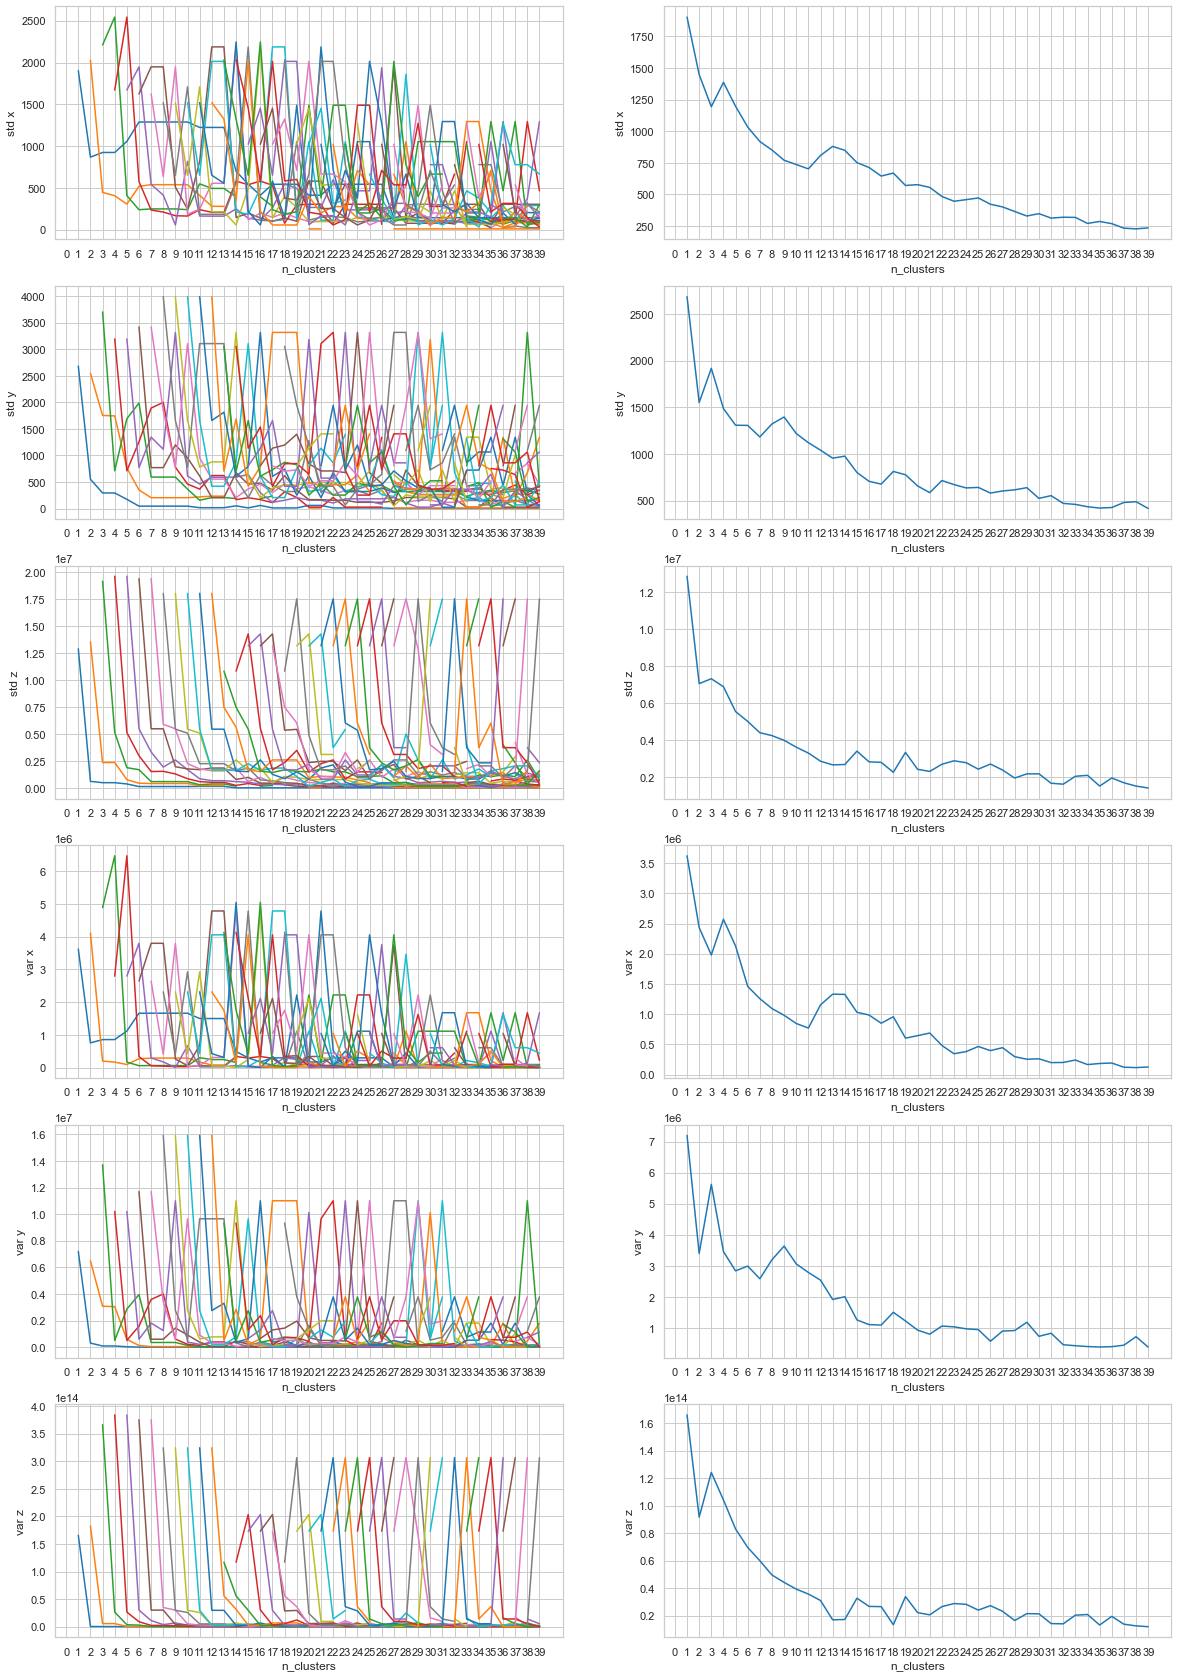

In [49]:
fig, axes = plt.subplots(6,2,figsize=(20,30))

for row in range(len(vars_dfs)):
    
    for i, df in enumerate([vars_dfs[row][j] for j in range(len(vars_dfs[row]))]):
    
        df.set_index('n_clusters').plot(legend=[], ax=axes[i][0], xticks=range(n_clusters+1))
        df.set_index('n_clusters').mean(axis=1).plot(ax=axes[i][1], xticks=range(n_clusters+1))
        axes[i][0].set_ylabel(vars_names[i])
        axes[i][1].set_ylabel(vars_names[i])

plt.show()

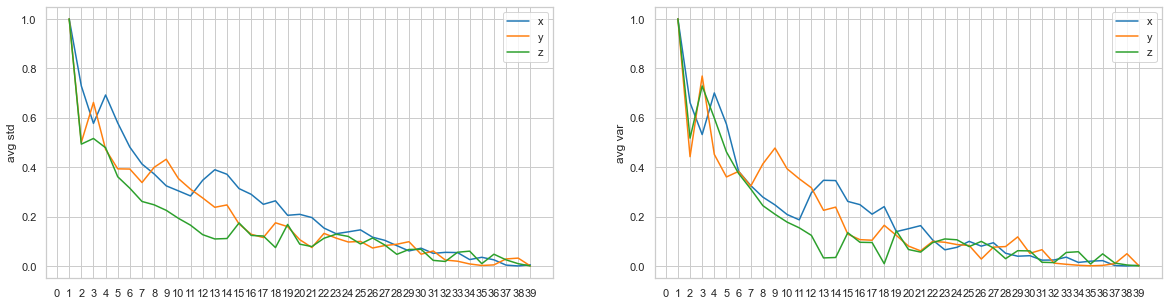

In [50]:
fig, axes = plt.subplots(1,2,figsize=(20,5))

for row in [0]:
    
    for i, df in enumerate([vars_dfs[row][j] for j in range(len(vars_dfs[row]))]):
    
#    pd.concat([df.set_index('n_clusters').mean(axis=1) for df in scrs_dfs[row][:3]], axis=1).mean(axis=1).plot(xticks=range(n_clusters+1), ax=ax0)
       
        #df.set_index('n_clusters').plot(legend=[], ax=axes[i][0], xticks=range(n_clusters+1))
        pd.DataFrame(mms().fit_transform(df.set_index('n_clusters').mean(axis=1).to_frame()), index=list(range(1,len(df)+1))).plot(ax=axes[(0 if i<3 else 1)], xticks=range(n_clusters+1))
        #axes[i][0].set_ylabel(vars_names[i])
        axes[0].set_ylabel('avg std')
        axes[1].set_ylabel('avg var')
    
    axes[0].legend(['x', 'y', 'z'])
    axes[1].legend(['x', 'y', 'z'])
    
plt.show()

ik0  scores


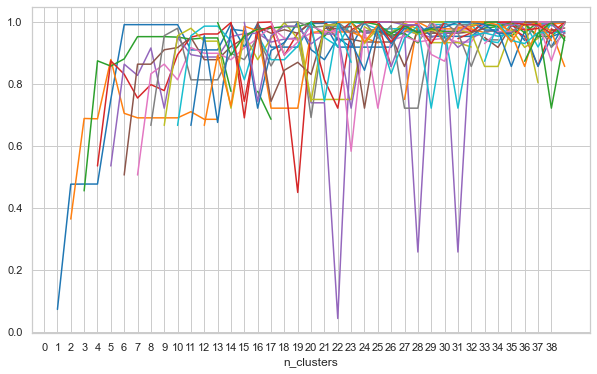

Press "Enter" for next prediction. "exit" to leave:  


In [55]:
for scrs_df, name in zip(scrs_dfs[0], names[0]):
    
    clear_output(wait=True)
    scrs_df.plot(x='n_clusters', figsize=(10,6), xticks=range(n_clusters), legend=[])
    #plt.legend(loc='right')
    print(name, ' scores')
    plt.show()
    if input('Press "Enter" for next prediction. "exit" to leave: ')=='exit': sys.exit(1)

### Average Scores

IndexError: list index out of range

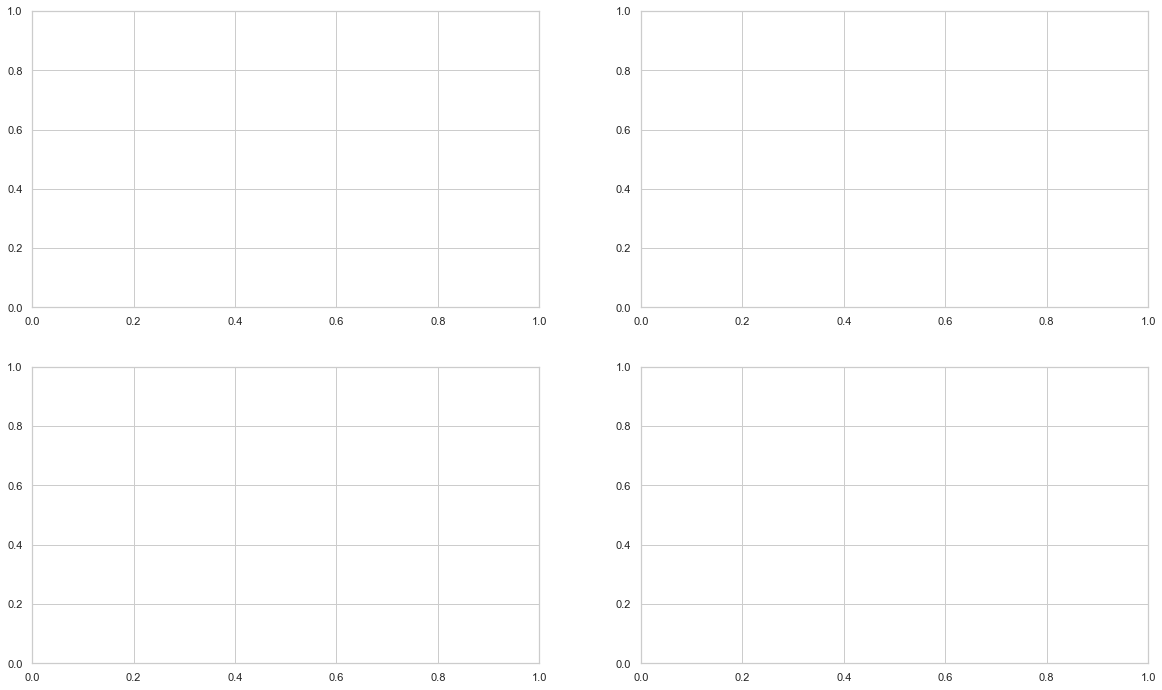

In [61]:
fig, axes = plt.subplots(2,2,figsize=(20,12))

axes[1][1].plot(pd.concat([df.set_index('n_clusters').mean(axis=1) for df in scrs_dfs[row][:3] for row in [0]], axis=1).mean(axis=1), color='red')
axes[1][1].set_xticks(range(n_clusters+1))    
#axes[1][1].set_xticks(range(1))    

for row in [0]:
    
    axes[1][0].plot(pd.concat([df.set_index('n_clusters').mean(axis=1) for df in scrs_dfs[row][:3]], axis=1).mean(axis=1))
    axes[1][0].set_xticks(range(n_clusters+1))
    
    for df, name, color in zip(scrs_dfs[row][:3], names[row][:3], ['blue', 'orange', 'green']):
        
        df.set_index('n_clusters').mean(axis=1).plot(xticks=range(n_clusters+1), ax=axes[0][0], color=color)
        if row==2: df.set_index('n_clusters').mean(axis=1).plot(xticks=range(n_clusters+1), ax=axes[0][1], color=color)
            
    axes[0][0].legend(names[row][:3])
     
plt.show()

# Final K-Means: Income

In [63]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler as ss, MinMaxScaler as mms

In [240]:
income_log = income[income.columns[:3]].apply(np.log1p).fillna(0)

income_ss = ss().fit_transform(income_log)
income_mms = mms().fit_transform(income_log)

# Clustering

#### padrão: 7 clusters, mms-scaled

In [241]:
variable = income.columns[0]

In [242]:
kmeans = KMeans(n_clusters=10, n_init=30).fit(income_ss)

income['cluster'] = kmeans.labels_

clusters = income['cluster'].copy()
sorted_clusters = income.groupby('cluster').mean().sort_values(by=variable).index.tolist()
    
kmeans.n_iter_

6

# Regression

In [243]:
        iis = data.set_index('neighborhood')[[income_cols[6]]]
        js = data.set_index('neighborhood')[[income_cols[5]]]
        ks = data.set_index('neighborhood')[['Km2']]

        xs = income[[income.columns[0]]]
        ys = income[[income.columns[1]]]
        zs = income[[income.columns[2]]]
    
        xs_i = [income[clusters==cluster][[income.columns[0]]] for cluster in sorted_clusters]
        ys_i = [income[clusters==cluster][[income.columns[1]]] for cluster in sorted_clusters]
        zs_i = [income[clusters==cluster][[income.columns[2]]] for cluster in sorted_clusters]

        iis_i = [data.set_index('neighborhood')[clusters==cluster][[income_cols[6]]] for cluster in sorted_clusters]
        js_i = [data.set_index('neighborhood')[clusters==cluster][[income_cols[5]]] for cluster in sorted_clusters]
        ks_i = [data.set_index('neighborhood')[clusters==cluster][['Km2']] for cluster in sorted_clusters]

        x1_i = [np.linspace(x.min(), x.max(), 200) for x in xs_i]
        y1_i = [np.linspace(y.min(), y.max(), 200) for y in ys_i]
        z1_i = [np.linspace(z.min(), z.max(), 200) for z in zs_i]

        ii1_i = [np.linspace(i.min(), i.max(), 200) for i in iis_i]
        j1_i = [np.linspace(j.min(), j.max(), 200) for j in js_i]
        k1_i = [np.linspace(k.min(), k.max(), 200) for k in ks_i]
   
    
        a1_i, b1_i = [], []
        a2_i, b2_i = [], []
        a3_i, b3_i = [], []
        a4_i, b4_i = [], []
        a5_i, b5_i = [], []
        a6_i, b6_i = [], []
    
        for i in range(len(sorted_clusters)):
            
            lr1 = lr().fit(js_i[i], iis_i[i])
        
            a1_i.append(lr1.coef_[0][0])
            b1_i.append(lr1.intercept_[0])
        
            lr2 = lr().fit(ks_i[i], js_i[i])
            
            a2_i.append(lr2.coef_[0][0])
            b2_i.append(lr2.intercept_[0])

            lr3 = lr().fit(iis_i[i], ks_i[i])
        
            a3_i.append(lr3.coef_[0][0])
            b3_i.append(lr3.intercept_[0])
    
            lr4 = lr().fit(iis_i[i], js_i[i])
        
            a4_i.append(lr4.coef_[0][0])
            b4_i.append(lr4.intercept_[0])
        
            lr5 = lr().fit(js_i[i], ks_i[i])
        
            a5_i.append(lr5.coef_[0][0])
            b5_i.append(lr5.intercept_[0])
        
            lr6 = lr().fit(ks_i[i], iis_i[i])
        
            a6_i.append(lr6.coef_[0][0])
            b6_i.append(lr6.intercept_[0])
        

# Predictions

In [244]:
        ij_pred = [a*j + b for a, b, j in zip(a1_i, b1_i, js_i)]
        jk_pred = [a*k + b for a, b, k in zip(a2_i, b2_i, ks_i)]
        ki_pred = [a*i+ b for a, b, i in zip(a3_i, b3_i, iis_i)]

        ji_pred = [a*i + b for a, b, i in zip(a4_i, b4_i, iis_i)]
        kj_pred = [a*j + b for a, b, j in zip(a5_i, b5_i, js_i)]
        ik_pred = [a*k + b for a, b, k in zip(a6_i, b6_i, ks_i)]

        ij_pred_grid = [a*j + b for a, b, j in zip(a1_i, b1_i, j1_i)]
        jk_pred_grid = [a*k + b for a, b, k in zip(a2_i, b2_i, k1_i)]
        ki_pred_grid = [a*i + b for a, b, i in zip(a3_i, b3_i, ii1_i)]

        ji_pred_grid = [a*i + b for a, b, i in zip(a4_i, b4_i, ii1_i)]
        kj_pred_grid = [a*j + b for a, b, j in zip(a5_i, b5_i, j1_i)]
        ik_pred_grid = [a*k + b for a, b, k in zip(a6_i, b6_i, k1_i)]

In [245]:
x1 = np.linspace(xs.min(), xs.max(), 200)
y1 = np.linspace(ys.min(), ys.max(), 200)
#z1 = np.linspace(zs.min(), zs.max(), 200)
 
x2, y2 = np.meshgrid(x1,y1)      

z_pred_1 = np.array([x*y for x,y in zip(x2, y2)])

In [246]:
x1 = np.linspace(-10, 10, 200)
y1 = np.linspace(-10, 10, 200)
#z1 = np.linspace(zs.min(), zs.max(), 200)
 
x3, y3 = np.meshgrid(x1,y1)      

z_pred_2 = np.array([x*y for x,y in zip(x3, y3)])

i ~ income
j ~ pop
k ~ Km2

x ~ income/pop
y ~ pop/Km2
z ~ income/Km2

x = i/j
y = j/k
z = i/k

i = x*j
z = x*j/k

z = xy
x = z/y
y = z/x

---

i = a1 * j + b1
j = a2 * k + b2
k = a3 * i + b3

x = (a1 * j + b1) / (a2*k + b2)
y = (a2 * k + b2) / (a3*i + b3)
z = (a1 * j + b1) / (a3*i + b3)



# Visualizing Result

In [247]:
fig_path = 'Plots\{}'

### Bar plot

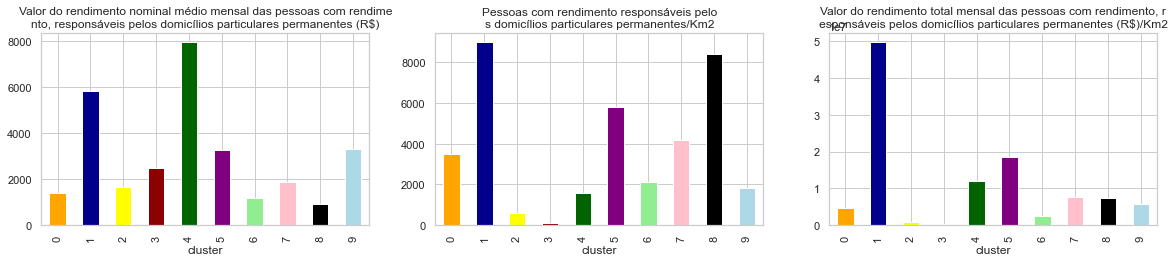

In [253]:
income_mean = income.groupby('cluster').mean()

fig = plt.figure(figsize=(20,12))
axes = [fig.add_subplot(3,3,i) for i in range(1, len(income.columns))]

for i, col in enumerate(income_mean):
    income_mean[col].plot(kind='bar', ax=axes[i], title=income.columns[i][:int(len(income.columns[i])/2)]+'\n'+income.columns[i][int(len(income.columns[i])/2):], color=[colors[j] for j in range(len(income['cluster'].unique()))])

fig.savefig(fig_path.format('Income_clusters_average_barplot.png'))

### Boxplot

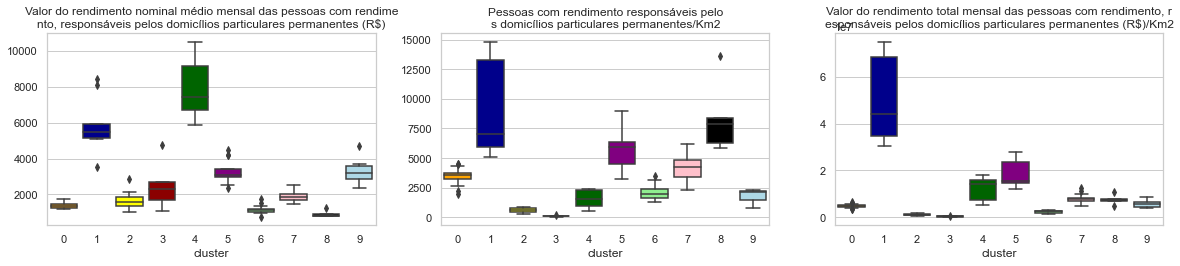

In [249]:
fig = plt.figure(figsize=(20,12))
axes=[fig.add_subplot(3,3,i+1) for i in range(len(income.columns)-1)]

for i in range(len(income.columns)-1):
    
    sns.boxplot(data=income, x='cluster', y=income.columns[i], ax=axes[i])
    axes[i].set_ylabel('')
    axes[i].set_title(income.columns[i][:int(len(income.columns[i])/2)]+'\n'+income.columns[i][int(len(income.columns[i])/2):])
    
    #if i==len(income.columns)-3:
     #   axes[i].set_ylim(-10000000,1e9*0.2)
    
    for j in range(len(income['cluster'].unique())):
        axes[i].artists[j].set_facecolor(colors[j])    # Setting colors to match clusters colors.

fig.savefig(fig_path.format('Income_clusters_boxplot.png'))

# XYZ

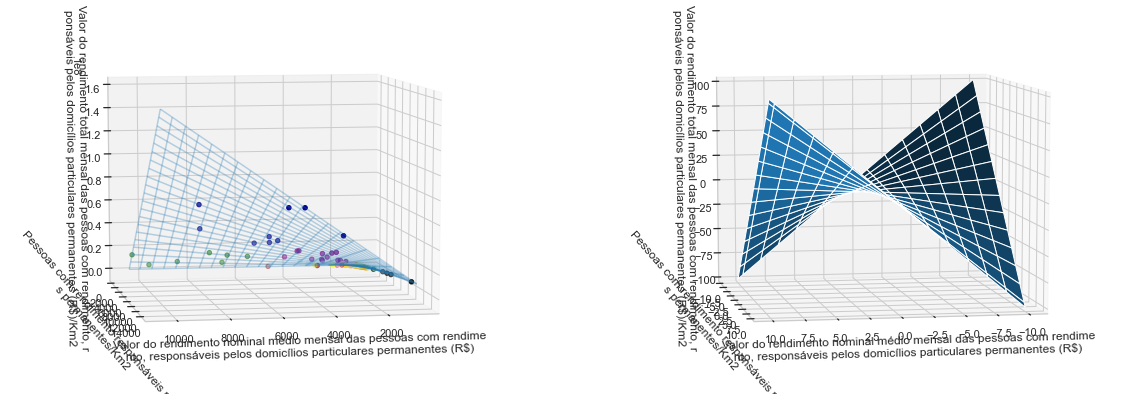

In [250]:
for angle in range(0,360,14):
    
    clear_output(wait=True)
    
    fig = plt.figure(figsize=(20,7))
    axes = [fig.add_subplot(1,2,i, projection='3d') for i in [1,2]]

    axes[0].plot_wireframe(x2, y2, z_pred_1, alpha=0.3, rstride=10, cstride=10)
    
    axes[0].set_xlabel(xs.columns[0][:int(len(xs.columns[0])/2)]+'\n'+xs.columns[0][int(len(xs.columns[0])/2):])
    axes[0].set_ylabel(ys.columns[0][:int(len(ys.columns[0])/2)]+'\n'+ys.columns[0][int(len(xs.columns[0])/2):])
    axes[0].set_zlabel(zs.columns[0][:int(len(zs.columns[0])/2)]+'\n'+zs.columns[0][int(len(xs.columns[0])/2):])

    axes[1].plot_surface(x3, y3, z_pred_2, alpha=1, rstride=15, cstride=15)
    
    axes[1].set_xlabel(xs.columns[0][:int(len(xs.columns[0])/2)]+'\n'+xs.columns[0][int(len(xs.columns[0])/2):])
    axes[1].set_ylabel(ys.columns[0][:int(len(ys.columns[0])/2)]+'\n'+ys.columns[0][int(len(xs.columns[0])/2):])
    axes[1].set_zlabel(zs.columns[0][:int(len(zs.columns[0])/2)]+'\n'+zs.columns[0][int(len(xs.columns[0])/2):])

    axes[0].scatter(xs, ys, zs, color=[colors[cluster] for cluster in income['cluster']])
    
    
#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)
    
    axes[0].view_init(8, angle+90)
    axes[1].view_init(8, angle+90)
    
    plt.show()
    plt.pause(0.0001)
    
fig.savefig(fig_path.format('Income_clusters_3dplot.png'))

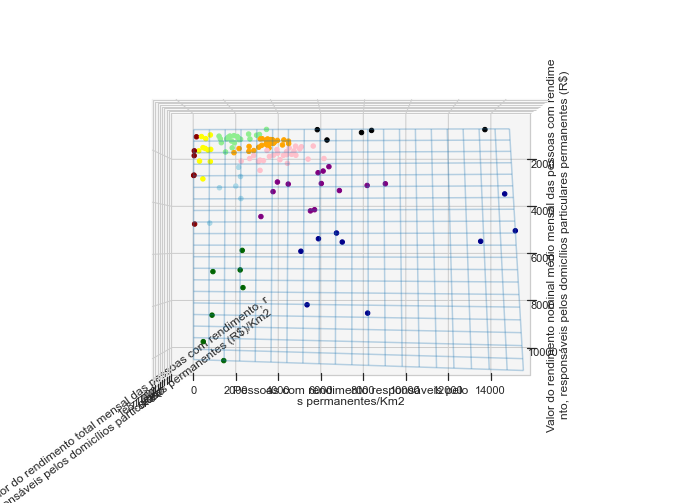

In [252]:
for angle in range(0,361,9):
    
    clear_output(wait=True)
    
    fig = plt.figure(figsize=(12,9))
    ax0 = fig.add_subplot(111, projection='3d')

    ax0.scatter(xs, ys, zs=zs, c=[colors[cluster] for cluster in income['cluster']], alpha=1)
    ax0.plot_wireframe(x2, y2, z_pred_1, alpha=0.3, rstride=10, cstride=10)
    
    ax0.set_xlabel(xs.columns[0][:int(len(xs.columns[0])/2)]+'\n'+xs.columns[0][int(len(xs.columns[0])/2):])
    ax0.set_ylabel(ys.columns[0][:int(len(ys.columns[0])/2)]+'\n'+ys.columns[0][int(len(xs.columns[0])/2):])
    ax0.set_zlabel(zs.columns[0][:int(len(zs.columns[0])/2)]+'\n'+zs.columns[0][int(len(xs.columns[0])/2):])

#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)
    
    ax0.view_init(angle/4, angle)
    plt.show()
    plt.pause(0.001)

fig.savefig(fig_path.format('Income_clusters_topview.png'))

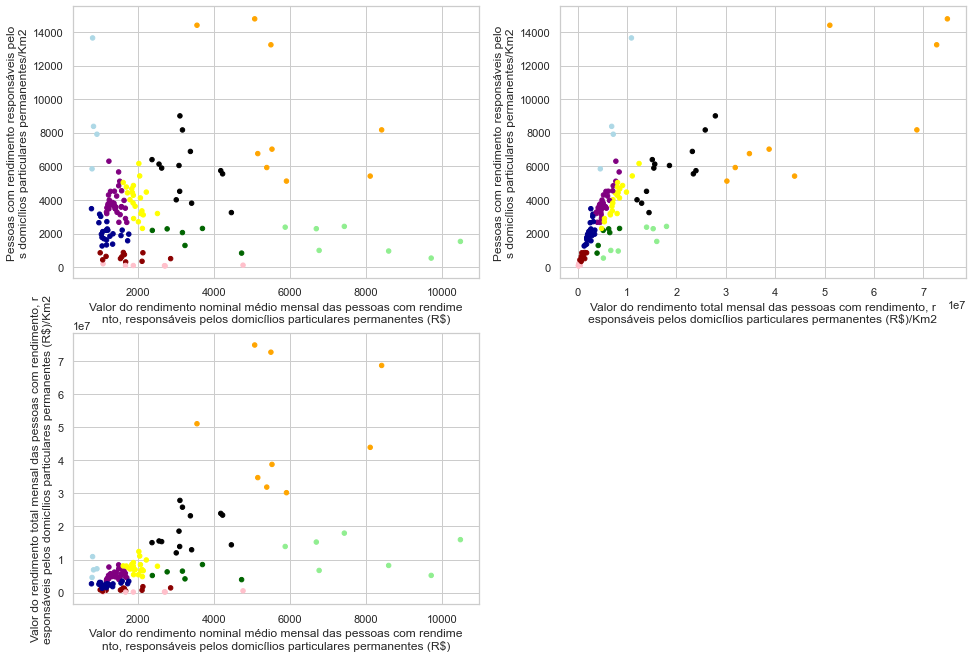

In [80]:
fig = plt.figure(figsize=(16,11))
axes = [fig.add_subplot(2,2,i) for i in range(1,4)]

axes[0].scatter(xs, ys, color=[colors[cluster] for cluster in income['cluster']], alpha=1, s=20)

axes[1].scatter(zs, ys, color=[colors[cluster] for cluster in income['cluster']], alpha=1, s=20)

axes[2].scatter(xs, zs, color=[colors[cluster] for cluster in income['cluster']], alpha=1, s=20)

#ax0.set_xlim(-1000,25000)
#ax0.set_ylim(-0.05*1e8,1e8) 
#ax0.set_zlim(500,5000)

axes[0].set_xlabel(xs.columns[0][:int(len(xs.columns[0])/2)]+'\n'+xs.columns[0][int(len(xs.columns[0])/2):])
axes[0].set_ylabel(ys.columns[0][:int(len(ys.columns[0])/2)]+'\n'+ys.columns[0][int(len(ys.columns[0])/2):])

axes[1].set_xlabel(zs.columns[0][:int(len(zs.columns[0])/2)]+'\n'+zs.columns[0][int(len(zs.columns[0])/2):])
axes[1].set_ylabel(ys.columns[0][:int(len(ys.columns[0])/2)]+'\n'+ys.columns[0][int(len(ys.columns[0])/2):])

axes[2].set_xlabel(xs.columns[0][:int(len(xs.columns[0])/2)]+'\n'+xs.columns[0][int(len(xs.columns[0])/2):])
axes[2].set_ylabel(zs.columns[0][:int(len(zs.columns[0])/2)]+'\n'+zs.columns[0][int(len(zs.columns[0])/2):])

#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)

plt.show()

# IJK

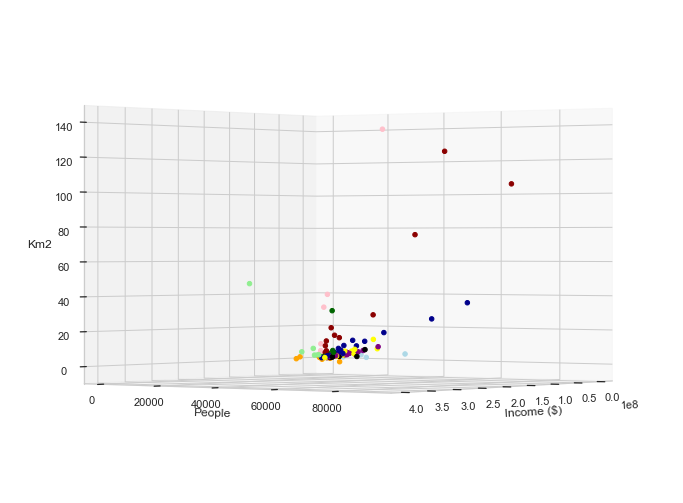

In [81]:
for angle in range(1,360,9):
    
    fig = plt.figure(figsize=(12,9))
    ax0 = fig.add_subplot(111, projection='3d')

    ax0.scatter(iis, js, zs=ks, c=[colors[cluster] for cluster in income['cluster']], alpha=1)

#ax0.set_xlim(-1000,25000)
#ax0.set_ylim(-0.05*1e8,1e8) 
#ax0.set_zlim(500,5000)

    ax0.set_xlabel('Income ($)')
    ax0.set_ylabel('People')
    ax0.set_zlabel('Km2')

#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)
    
    ax0.view_init(0, angle+45)
    plt.show()
    plt.pause(0.01)
    clear_output(wait=True)

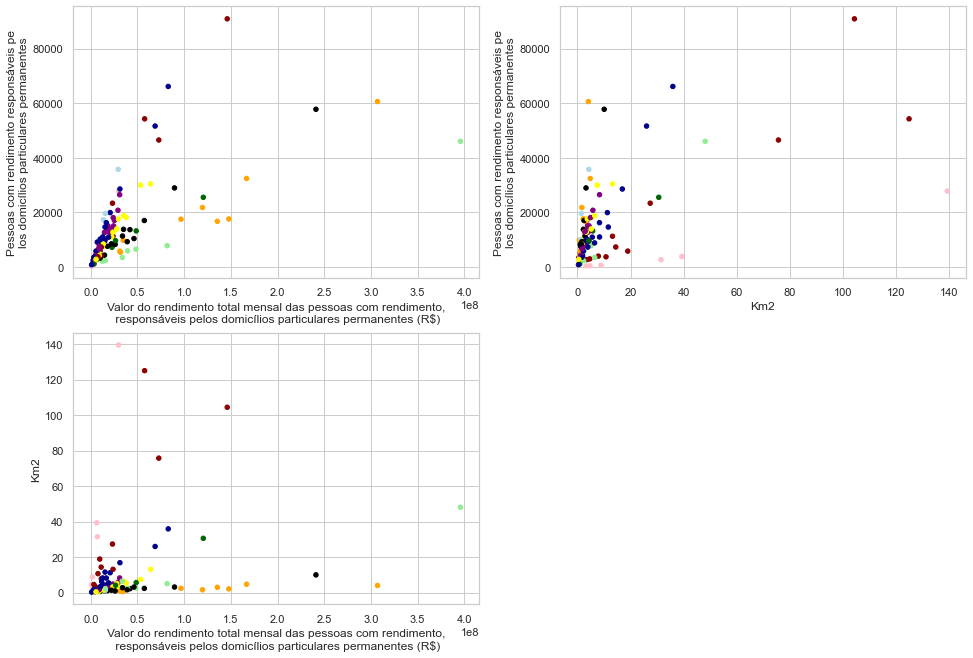

In [84]:
fig = plt.figure(figsize=(16,11))
axes = [fig.add_subplot(2,2,i) for i in range(1,4)]

axes[0].scatter(iis, js, color=[colors[cluster] for cluster in income['cluster']], alpha=1, s=20)

axes[1].scatter(ks, js, color=[colors[cluster] for cluster in income['cluster']], alpha=1, s=20)

axes[2].scatter(iis, ks, color=[colors[cluster] for cluster in income['cluster']], alpha=1, s=20)

#ax0.set_xlim(-1000,25000)
#ax0.set_ylim(-0.05*1e8,1e8) 
#ax0.set_zlim(500,5000)

axes[0].set_xlabel(iis.columns[0][:int(len(iis.columns[0])/2)]+'\n'+iis.columns[0][int(len(iis.columns[0])/2):])
axes[0].set_ylabel(js.columns[0][:int(len(js.columns[0])/2)]+'\n'+js.columns[0][int(len(js.columns[0])/2):])

axes[1].set_xlabel('Km2')
axes[1].set_ylabel(js.columns[0][:int(len(js.columns[0])/2)]+'\n'+js.columns[0][int(len(js.columns[0])/2):])

axes[2].set_xlabel(iis.columns[0][:int(len(iis.columns[0])/2)]+'\n'+iis.columns[0][int(len(iis.columns[0])/2):])
axes[2].set_ylabel('Km2')

#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)

plt.show()

In [83]:
for cluster in sorted_clusters:
    
    for angle in range(1,360,9):
    
        fig = plt.figure(figsize=(12,9))
        ax0 = fig.add_subplot(111, projection='3d')

        ax0.scatter(iis[(clusters==cluster).values], js[(clusters==cluster).values], zs=ks[(clusters==cluster).values], c=colors[cluster], alpha=1)

        ax0.set_xlabel('Income ($)')
        ax0.set_ylabel('Pop')
        ax0.set_zlabel('Km2')    
        
        ax0.view_init(angle, angle)
        plt.show()
        plt.pause(0.01)
        clear_output(wait=True)
        
    if input()=='exit': break

 exit


# XJ, YK, ZK

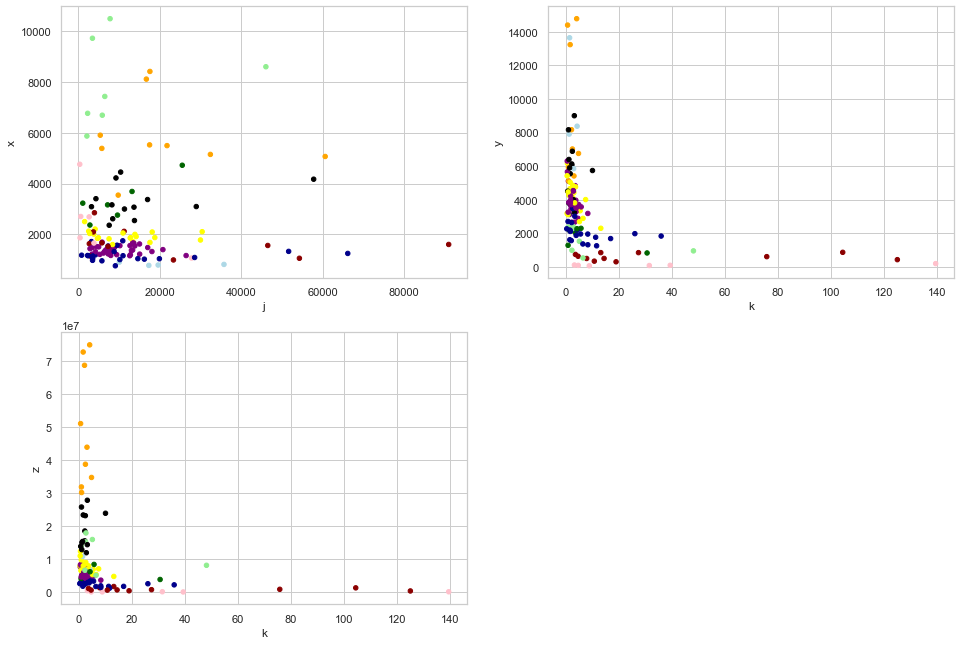

In [85]:
fig = plt.figure(figsize=(16,11))
axes = [fig.add_subplot(2,2,i) for i in range(1,4)]

axes[0].scatter(js, xs, color=[colors[cluster] for cluster in income['cluster']], alpha=1, s=20)

axes[1].scatter(ks, ys, color=[colors[cluster] for cluster in income['cluster']], alpha=1, s=20)

axes[2].scatter(ks, zs, color=[colors[cluster] for cluster in income['cluster']], alpha=1, s=20)

#ax0.set_xlim(-1000,25000)
#ax0.set_ylim(-0.05*1e8,1e8) 
#ax0.set_zlim(500,5000)

axes[0].set_xlabel('j')
axes[0].set_ylabel('x')

axes[1].set_xlabel('k')
axes[1].set_ylabel('y')

axes[2].set_xlabel('k')
axes[2].set_ylabel('z')

#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)

plt.show()

# XI, YJ, ZI

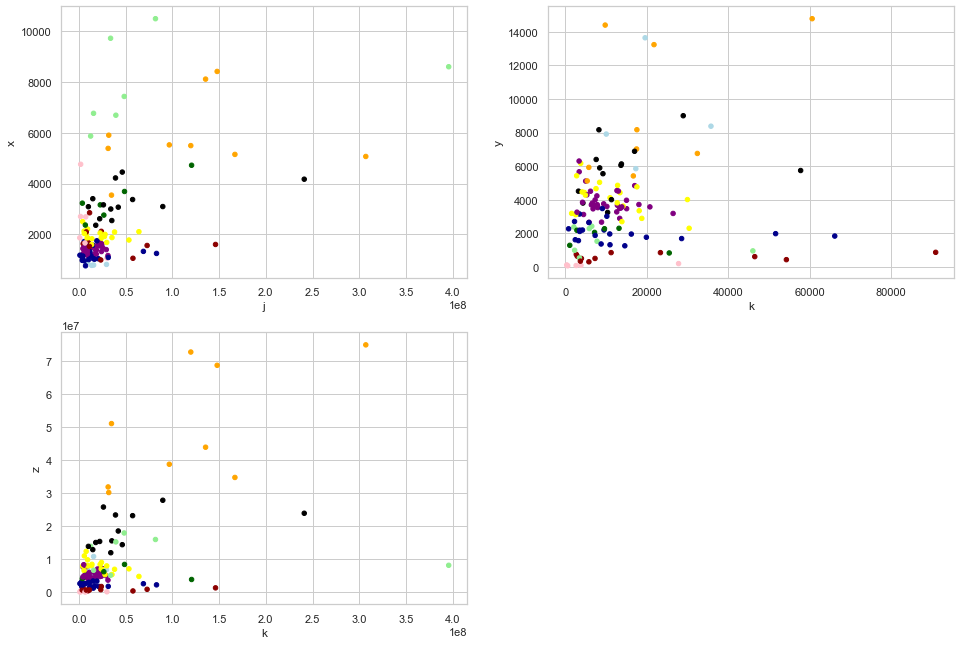

In [86]:
fig = plt.figure(figsize=(16,11))
axes = [fig.add_subplot(2,2,i) for i in range(1,4)]

axes[0].scatter(iis, xs, color=[colors[cluster] for cluster in income['cluster']], alpha=1, s=20)

axes[1].scatter(js, ys, color=[colors[cluster] for cluster in income['cluster']], alpha=1, s=20)

axes[2].scatter(iis, zs, color=[colors[cluster] for cluster in income['cluster']], alpha=1, s=20)

#ax0.set_xlim(-1000,25000)
#ax0.set_ylim(-0.05*1e8,1e8) 
#ax0.set_zlim(500,5000)

axes[0].set_xlabel('j')
axes[0].set_ylabel('x')

axes[1].set_xlabel('k')
axes[1].set_ylabel('y')

axes[2].set_xlabel('k')
axes[2].set_ylabel('z')

#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)

plt.show()

# XIJ

In [87]:
i1 = np.linspace(iis.min(), iis.max(), 200)
j1 = np.linspace(js.min(), js.max(), 200)
k1 = np.linspace(ks.min(), ks.max(), 200)

x1 = np.linspace(xs.min(), xs.max(), 200)
y1 = np.linspace(ys.min(), ys.max(), 200)
z1 = np.linspace(zs.min(), zs.max(), 200)

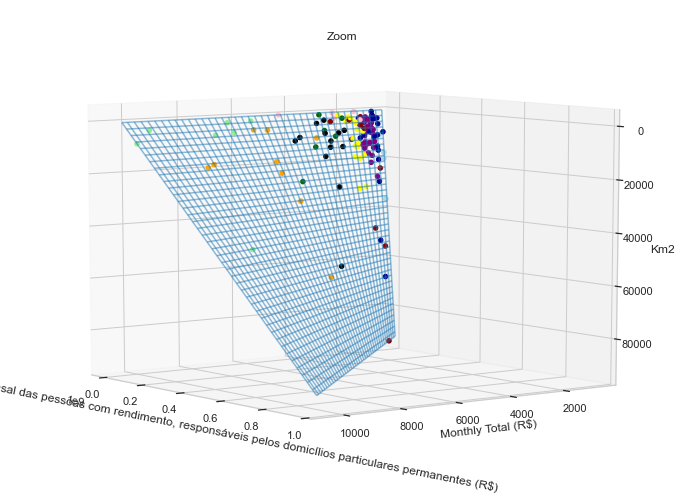

In [88]:
x2, j2 = np.meshgrid(x1, j1)

i_xj_pred = np.array([x2_i*j2_i for x2_i, j2_i in zip(x2, j2)])

for angle in range(1,360,9):
    
    fig = plt.figure(figsize=(12,9))
    ax0 = fig.add_subplot(111, projection='3d')

    ax0.scatter(iis, xs, js, c=[colors[cluster] for cluster in income['cluster']], alpha=1)
    ax0.plot_wireframe(i_xj_pred, x2, j2, rstride=5, cstride=5, alpha=0.5)
    
#ax0.set_xlim(-1000,25000)
#ax0.set_ylim(-0.05*1e8,1e8) 
#ax0.set_zlim(500,5000)

    ax0.set_xlabel(iis.columns[0])
    ax0.set_ylabel('Monthly Total (R$)')
    ax0.set_zlabel('Km2')
    ax0.set_title('Zoom')

#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)
    
    ax0.view_init(angle, angle+45)
    plt.show()
    plt.pause(0.01)
    clear_output(wait=True)

# YJK

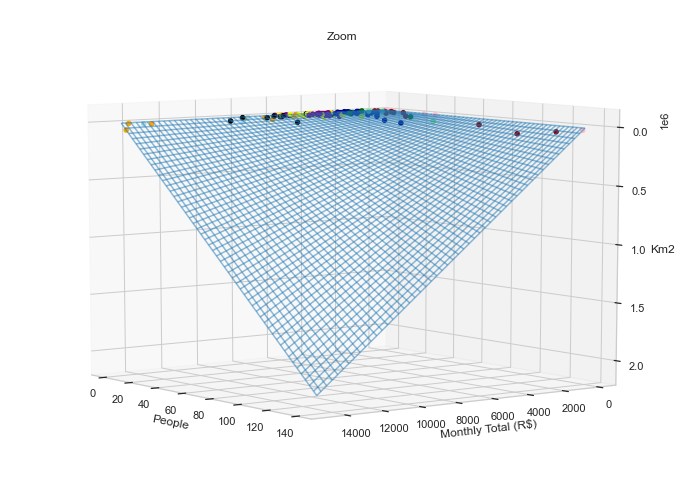

In [89]:
y2, k2 = np.meshgrid(y1, k1)

j_yk_pred = np.array([y2_i*k2_i for y2_i, k2_i in zip(y2, k2)])

for angle in range(1,360,9):
    
    fig = plt.figure(figsize=(12,9))
    ax0 = fig.add_subplot(111, projection='3d')

    ax0.scatter(ks, ys, js, c=[colors[cluster] for cluster in income['cluster']], alpha=1)
    ax0.plot_wireframe(k2, y2, j_yk_pred, alpha=0.5)

#ax0.set_xlim(-1000,25000)
#ax0.set_ylim(-0.05*1e8,1e8) 
#ax0.set_zlim(500,5000)

    ax0.set_xlabel('People')
    ax0.set_ylabel('Monthly Total (R$)')
    ax0.set_zlabel('Km2')
    ax0.set_title('Zoom')

#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)
    
    ax0.view_init(angle, angle+45)
    plt.show()
    plt.pause(0.01)
    clear_output(wait=True)

# ZKI

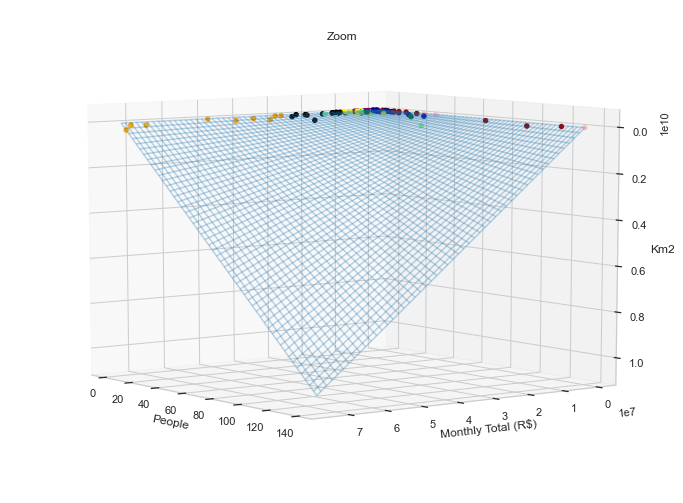

In [90]:
k2, z2 = np.meshgrid(k1, z1)

i_kz_pred = np.array([k2_i*z2_i for k2_i, z2_i in zip(k2, z2)])

for angle in range(1,360,9):
    
    fig = plt.figure(figsize=(12,9))
    ax0 = fig.add_subplot(111, projection='3d')

    ax0.scatter(ks, zs, iis, c=[colors[cluster] for cluster in income['cluster']], alpha=1)
    ax0.plot_wireframe(k2, z2, i_kz_pred, alpha=0.3)
    
#ax0.set_xlim(-1000,25000)
#ax0.set_ylim(-0.05*1e8,1e8) 
#ax0.set_zlim(500,5000)

    ax0.set_xlabel('People')
    ax0.set_ylabel('Monthly Total (R$)')
    ax0.set_zlabel('Km2')
    ax0.set_title('Zoom')

#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)
    
    ax0.view_init(angle, angle+45)
    plt.show()
    plt.pause(0.01)
    clear_output(wait=True)

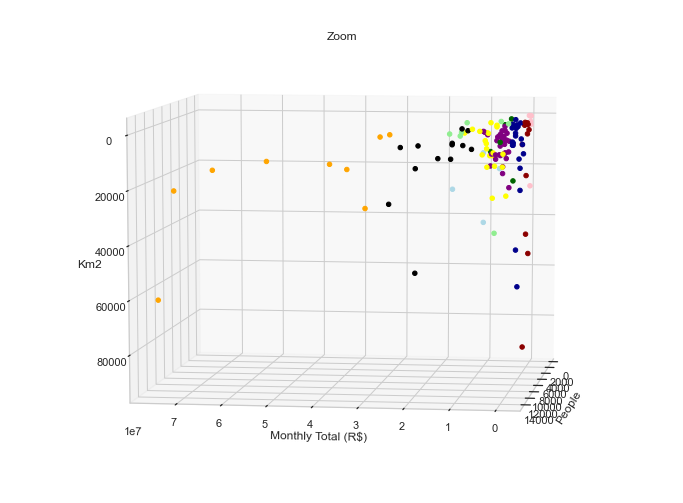

In [91]:
k2, z2 = np.meshgrid(k1, z1)

i_kz_pred = np.array([k2_i*z2_i for k2_i, z2_i in zip(k2, z2)])

for angle in range(1,360,9):
    
    fig = plt.figure(figsize=(12,9))
    ax0 = fig.add_subplot(111, projection='3d')

    ax0.scatter(ys, zs, js, c=[colors[cluster] for cluster in income['cluster']], alpha=1)
    #ax0.plot_wireframe(k2, z2, i_kz_pred, alpha=0.3)
    
#ax0.set_xlim(-1000,25000)
#ax0.set_ylim(-0.05*1e8,1e8) 
#ax0.set_zlim(500,5000)

    ax0.set_xlabel('People')
    ax0.set_ylabel('Monthly Total (R$)')
    ax0.set_zlabel('Km2')
    ax0.set_title('Zoom')

#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)
    
    ax0.view_init(angle, angle)
    plt.show()
    plt.pause(0.01)
    clear_output(wait=True)

## XYI, XYJ, XYK

In [92]:
var_lst = [iis, js, ks]
for var in var_lst:
    
    for angle in range(1,360,9):
    
        fig = plt.figure(figsize=(12,9))
        ax0 = fig.add_subplot(111, projection='3d')

        ax0.scatter(var, ys, xs, c=[colors[cluster] for cluster in income['cluster']], alpha=1)
    
        ax0.set_xlabel(var.columns[0])
        ax0.set_ylabel(ys.columns[0])
        ax0.set_zlabel(xs.columns[0])

        ax0.view_init(angle, angle+45)
        plt.show()
        plt.pause(0.001)
        clear_output(wait=True)
        
    if input()=='exit': break

 exit


## YZI, YZJ, YZK

In [93]:
var_lst = [iis, js, ks]
for var in var_lst:
    
    for angle in range(1,360,9):
    
        fig = plt.figure(figsize=(12,9))
        ax0 = fig.add_subplot(111, projection='3d')

        ax0.scatter(var, ys, zs, c=[colors[cluster] for cluster in income['cluster']], alpha=1)
    
        ax0.set_xlabel(var.columns[0])
        ax0.set_ylabel(ys.columns[0])
        ax0.set_zlabel(zs.columns[0])

        ax0.view_init(angle, angle+45)
        plt.show()
        plt.pause(0.001)
        clear_output(wait=True)
        
    if input()=='exit': break

 exit


## XZI, XZJ, XZK

In [94]:
var_lst = [iis, js, ks]
for var in var_lst:
    
    for angle in range(1,360,9):
    
        fig = plt.figure(figsize=(12,9))
        ax0 = fig.add_subplot(111, projection='3d')

        ax0.scatter(var, xs, zs, c=[colors[cluster] for cluster in income['cluster']], alpha=1)
    
        ax0.set_xlabel(var.columns[0])
        ax0.set_ylabel(xs.columns[0])
        ax0.set_zlabel(zs.columns[0])

        ax0.view_init(angle, angle+45)
        plt.show()
        plt.pause(0.001)
        clear_output(wait=True)
        
    if input()=='exit': break

 exit


## Bar Plot

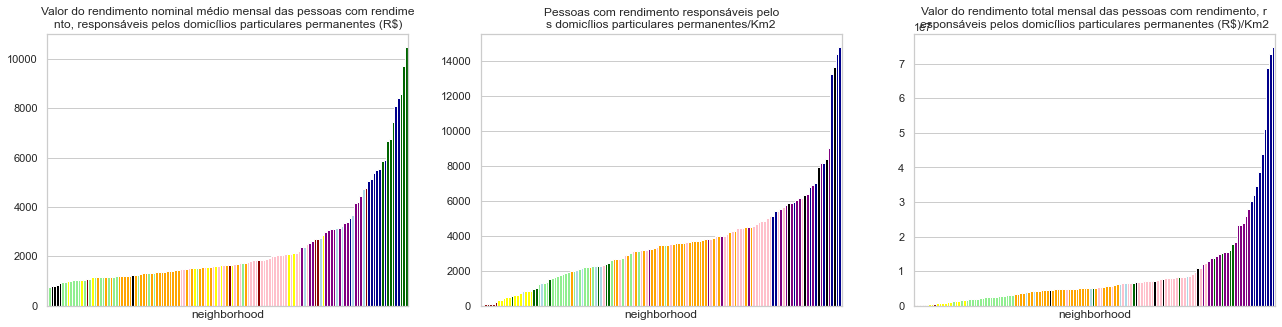

In [254]:
fig, axes = plt.subplots(1,3,figsize=(22,5))

for i, col in zip(range(3), income.columns[:-1]):
    
    income.sort_values(by=col)[col].plot.bar(color=[colors[cluster] for cluster in income.sort_values(by=col)['cluster']], xticks=[], ax=axes[i], title=col[:int(len(col)/2)] + '\n' + col[int(len(col)/2):], width=1)

fig.savefig(fig_path.format('Income_clusters_barplot.png'))

# Filtering by Income:

In [255]:
{index:colors[index] for index in income['cluster'].unique()}

{7: 'pink',
 3: 'darkred',
 0: 'orange',
 5: 'purple',
 9: 'lightblue',
 6: 'lightgreen',
 4: 'darkgreen',
 1: 'darkblue',
 2: 'yellow',
 8: 'black'}

#### Top cluster: 0

In [256]:
income_filt = income[income['cluster'].isin([1])].copy()

filtered1 = income_filt.copy()

filtered1.shape

(9, 4)

In [257]:
filtered1

Valor do rendimento nominal médio mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$)  \
neighborhood                                                                                                                                     
botafogo                                            5146.563820                                                                                  
catete                                              3545.980726                                                                                  
copacabana                                          5065.249035                                                                                  
flamengo                                            5492.289701                                                                                  
humaita                                             5901.564179                                                                                  
ipanema                                             8106.327031                                                                                  
laranjeiras                                         5520.633560                                                                                  
leblon                                              8407.644246                                                                                  
leme                                                5382.890884                                                                                  

              Pessoas com rendimento responsáveis pelos domicílios particulares permanentes/Km2  \
neighborhood                                                                                      
botafogo                                            6757.094905                                   
catete                                             14398.847396                                   
copacabana                                         14778.886684                                   
flamengo                                           13234.899026                                   
humaita                                             5120.081906                                   
ipanema                                             5417.991144                                   
laranjeiras                                         7021.836069                                   
leblon                                              8168.702393                                   
leme                                                5927.144518                                   

              Valor do rendimento total mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$)/Km2  \
neighborhood                                                                                                                                 
botafogo                                           3.477582e+07                                                                              
catete                                             5.105804e+07                                                                              
copacabana                                         7.485874e+07                                                                              
flamengo                                           7.268990e+07                                                                              
humaita                                            3.021649e+07                                                                              
ipanema                                            4.392001e+07                                                                              
laranjeiras                                        3.876498e+07                                                                              
leblon                                 

In [258]:
recom_path = 'Recommendation Datasets\{}'

In [259]:
import dataframe_image as dfi
 

In [262]:
dfi.export(filtered1.iloc[:, :-1], recom_path.format('ByIncome.png'))

filtered1.describe()

income.describe()

# Population

In [264]:
pop = data[['neighborhood', 'adult_pop/Km2', 'target_pop/Km2']].set_index('neighborhood').copy()

In [1086]:
#pop2 = data[['neighborhood', 'adult_pop/Km2', 'target pop', 'target_pop/Km2', 'Km2']].set_index('neighborhood').copy()

pop = pop.loc[filtered1.index].copy()

pop = pop_filt.copy()

([], <a list of 0 Text major ticklabel objects>)

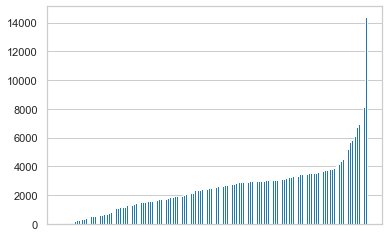

In [265]:
plt.bar(x=pop.sort_values(by='target_pop/Km2').index, height = pop['target_pop/Km2'].sort_values())

plt.xticks([])

([], <a list of 0 Text major ticklabel objects>)

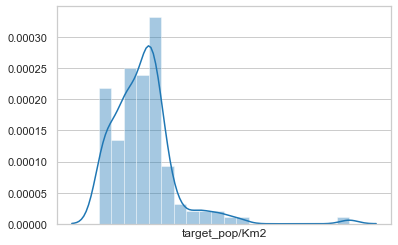

In [266]:
sns.distplot(pop['target_pop/Km2'].sort_values(), bins=20)

plt.xticks([])

# Data Transformation

In [267]:
from sklearn.preprocessing import StandardScaler as ss, MinMaxScaler as mms

In [268]:
pop = data[['neighborhood', 'adult_pop/Km2', 'target_pop/Km2']].set_index('neighborhood').copy()

In [269]:
pop_log = pop.apply(np.log1p)#[['pop/Km2', 'target_pop/Km2']]

pop_ss = ss().fit_transform(pop_log)
pop_mms = mms().fit_transform(pop_log)

# KMeans

In [270]:
from sklearn.cluster import KMeans

In [271]:
colors = ['orange', 'darkblue', 'yellow', 'darkred', 'darkgreen', 'purple', 'lightgreen', 'pink', 'black', 'lightblue']*6     # Colors to differentiate clusters

### Optimization

In [115]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import r2_score

In [116]:
pop.columns[:5]

Index(['adult_pop/Km2', 'target_pop/Km2'], dtype='object')

In [117]:
pop = data[['neighborhood', 'adult_pop/Km2', 'target_pop/Km2']].set_index('neighborhood').copy()

pop_log = pop.apply(np.log1p)#[['pop/Km2', 'target_pop/Km2']]
pop_ss = ss().fit_transform(pop_log)
pop_mms = mms().fit_transform(pop_log)

xs = data[['Km2']]
ys = data[['target pop']]
zs = data[['adult pop']]

scrs_pop = []
vars_pop = []

#for variable in ['adult_pop/Km2', 'target_pop/Km2']:
for a in range(15):
    inertia = []

    std_target = []
    std_adult = []
    var_target = []
    var_adult = []

    scrs_yx = []
    scrs_xy = []
    scrs_zx = []
    scrs_xz = []
    scrs_zy = []
    scrs_yz = []

    
    for n_clusters in range(1, 40):
        kmeans = KMeans(n_clusters=n_clusters, n_init=30).fit(pop_ss)
        
        pop['cluster'] = kmeans.labels_
    
        clusters = pop['cluster'].copy()
        sorted_clusters = pop.groupby('cluster').mean().sort_values(by=pop.columns[2]).index.tolist()

#--- Regression ------
    
        xs_i = [data.set_index('neighborhood')[clusters==cluster][['Km2']] for cluster in sorted_clusters]
        ys_i = [data.set_index('neighborhood')[clusters==cluster][['target pop']] for cluster in sorted_clusters]
        zs_i = [data.set_index('neighborhood')[clusters==cluster][['adult pop']] for cluster in sorted_clusters]
    
        x1_i = [np.linspace(x.min(), x.max(), 200) for x in xs_i]
        y1_i = [np.linspace(y.min(), y.max(), 200) for y in ys_i]
        z1_i = [np.linspace(z.min(), z.max(), 200) for z in zs_i]
    
    
        a1_i, b1_i = [], []
        a2_i, b2_i = [], []
        a3_i, b3_i = [], []
        a4_i, b4_i = [], []
        a5_i, b5_i = [], []
        a6_i, b6_i = [], []
    
        for i in range(len(sorted_clusters)):
        
            lr1 = lr().fit(xs_i[i], ys_i[i])
        
            a1_i.append(lr1.coef_[0][0])
            b1_i.append(lr1.intercept_[0])
        
            lr2 = lr().fit(ys_i[i], xs_i[i])
        
            a2_i.append(lr2.coef_[0][0])
            b2_i.append(lr2.intercept_[0])

            lr3 = lr().fit(xs_i[i], zs_i[i])
        
            a3_i.append(lr3.coef_[0][0])
            b3_i.append(lr3.intercept_[0])
    
            lr4 = lr().fit(zs_i[i], xs_i[i])
        
            a4_i.append(lr4.coef_[0][0])
            b4_i.append(lr4.intercept_[0])
        
            lr5 = lr().fit(ys_i[i], zs_i[i])
        
            a5_i.append(lr5.coef_[0][0])
            b5_i.append(lr5.intercept_[0])
        
            lr6 = lr().fit(zs_i[i], ys_i[i])
        
            a6_i.append(lr6.coef_[0][0])
            b6_i.append(lr6.intercept_[0])
        
        
#--- Predictions ------


        yx_pred = [a*x + b for a, b, x in zip(a1_i, b1_i, xs_i)]
        xy_pred = [a*y + b for a, b, y in zip(a2_i, b2_i, ys_i)]
        zx_pred = [a*x + b for a, b, x in zip(a3_i, b3_i, xs_i)]
        xz_pred = [a*z + b for a, b, z in zip(a4_i, b4_i, zs_i)]
        zy_pred = [a*y + b for a, b, y in zip(a5_i, b5_i, ys_i)]
        yz_pred = [a*z + b for a, b, z in zip(a6_i, b6_i, zs_i)]        

        yx_pred_grid = [a*x + b for a, b, x in zip(a1_i, b1_i, x1_i)]
        xy_pred_grid = [a*y + b for a, b, y in zip(a2_i, b2_i, y1_i)]
        zx_pred_grid = [a*x + b for a, b, x in zip(a3_i, b3_i, x1_i)]
        xz_pred_grid = [a*z + b for a, b, z in zip(a4_i, b4_i, z1_i)]
        zy_pred_grid = [a*y + b for a, b, y in zip(a5_i, b5_i, y1_i)]
        yz_pred_grid = [a*z + b for a, b, z in zip(a6_i, b6_i, z1_i)]        


#--- Statistics ------

    #std_x1 = pop.groupby('cluster', sort=True).std()['target_pop/Km2'].tolist()
    #std_x2 = pop.groupby('cluster', sort=True).std()['adult_pop/Km2'].tolist()
    
        std_x1 = [pop[pop['cluster']==cluster].std()['target_pop/Km2'] for cluster in sorted_clusters]
        std_x2 = [pop[pop['cluster']==cluster].std()['adult_pop/Km2'] for cluster in sorted_clusters]
        var_x1 = [pop[pop['cluster']==cluster].var()['target_pop/Km2'] for cluster in sorted_clusters]
        var_x2 = [pop[pop['cluster']==cluster].var()['adult_pop/Km2'] for cluster in sorted_clusters]
    
    #print(sorted_clusters)
    #print(std_x1)
    #if input()=='exit': break
    
        scrs_yx.append([n_clusters]+[r2_score(y_i, yx_pred_i) for y_i, yx_pred_i in zip(ys_i, yx_pred)])
        scrs_xy.append([n_clusters]+[r2_score(x_i, xy_pred_i) for x_i, xy_pred_i in zip(xs_i, xy_pred)])
        scrs_zx.append([n_clusters]+[r2_score(z_i, zx_pred_i) for z_i, zx_pred_i in zip(zs_i, zx_pred)])
        scrs_xz.append([n_clusters]+[r2_score(x_i, xz_pred_i) for x_i, xz_pred_i in zip(xs_i, xz_pred)])
        scrs_zy.append([n_clusters]+[r2_score(z_i, zy_pred_i) for z_i, zy_pred_i in zip(zs_i, zy_pred)])
        scrs_yz.append([n_clusters]+[r2_score(y_i, yz_pred_i) for y_i, yz_pred_i in zip(ys_i, yz_pred)])

        inertia.append([n_clusters, kmeans.inertia_])
        std_target.append([n_clusters]+std_x1)
        std_adult.append([n_clusters]+std_x2)
        var_target.append([n_clusters]+var_x1)
        var_adult.append([n_clusters]+var_x2)

#-------
        
        if n_clusters in range(1,40,4): 
            clear_output(wait=True)
            print(n_clusters)
    

#--- Dataframe Conversion
    
    inertia_df = pd.DataFrame(inertia, columns=['n_clusters', 'inertia'])
    std_target_df = pd.DataFrame(std_target, columns=['n_clusters']+['cluster'+str(j) for j in range(1, n_clusters+1)])
    std_adult_df = pd.DataFrame(std_adult, columns=['n_clusters']+['cluster'+str(j) for j in range(1, n_clusters+1)])
    var_target_df = pd.DataFrame(var_target, columns=['n_clusters']+['cluster'+str(j) for j in range(1, n_clusters+1)])
    var_adult_df = pd.DataFrame(var_adult, columns=['n_clusters']+['cluster'+str(j) for j in range(1, n_clusters+1)])

    scrs_yx_df = pd.DataFrame(scrs_yx, columns=['n_clusters']+['cluster'+str(i) for i in range(1, n_clusters+1)])
    scrs_xy_df = pd.DataFrame(scrs_xy, columns=['n_clusters']+['cluster'+str(i) for i in range(1, n_clusters+1)])
    scrs_zx_df = pd.DataFrame(scrs_zx, columns=['n_clusters']+['cluster'+str(i) for i in range(1, n_clusters+1)])
    scrs_xz_df = pd.DataFrame(scrs_xz, columns=['n_clusters']+['cluster'+str(i) for i in range(1, n_clusters+1)])
    scrs_zy_df = pd.DataFrame(scrs_zy, columns=['n_clusters']+['cluster'+str(i) for i in range(1, n_clusters+1)])
    scrs_yz_df = pd.DataFrame(scrs_yz, columns=['n_clusters']+['cluster'+str(i) for i in range(1, n_clusters+1)])

    vars_pop.append([std_target_df, std_adult_df, var_target_df, var_adult_df])
    scrs_pop.append([scrs_yx_df, scrs_xy_df, scrs_zx_df, scrs_xz_df, scrs_zy_df, scrs_yz_df])

37


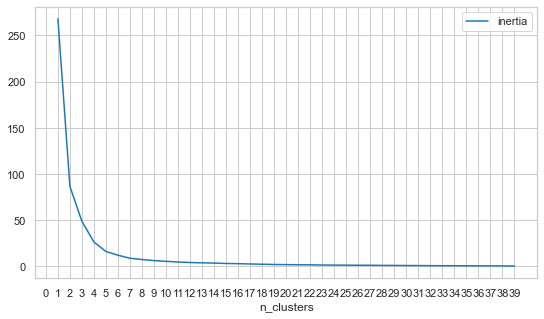

In [118]:
inertia_df.plot('n_clusters', 'inertia', xticks=range(40), figsize=(9,5))

plt.show()

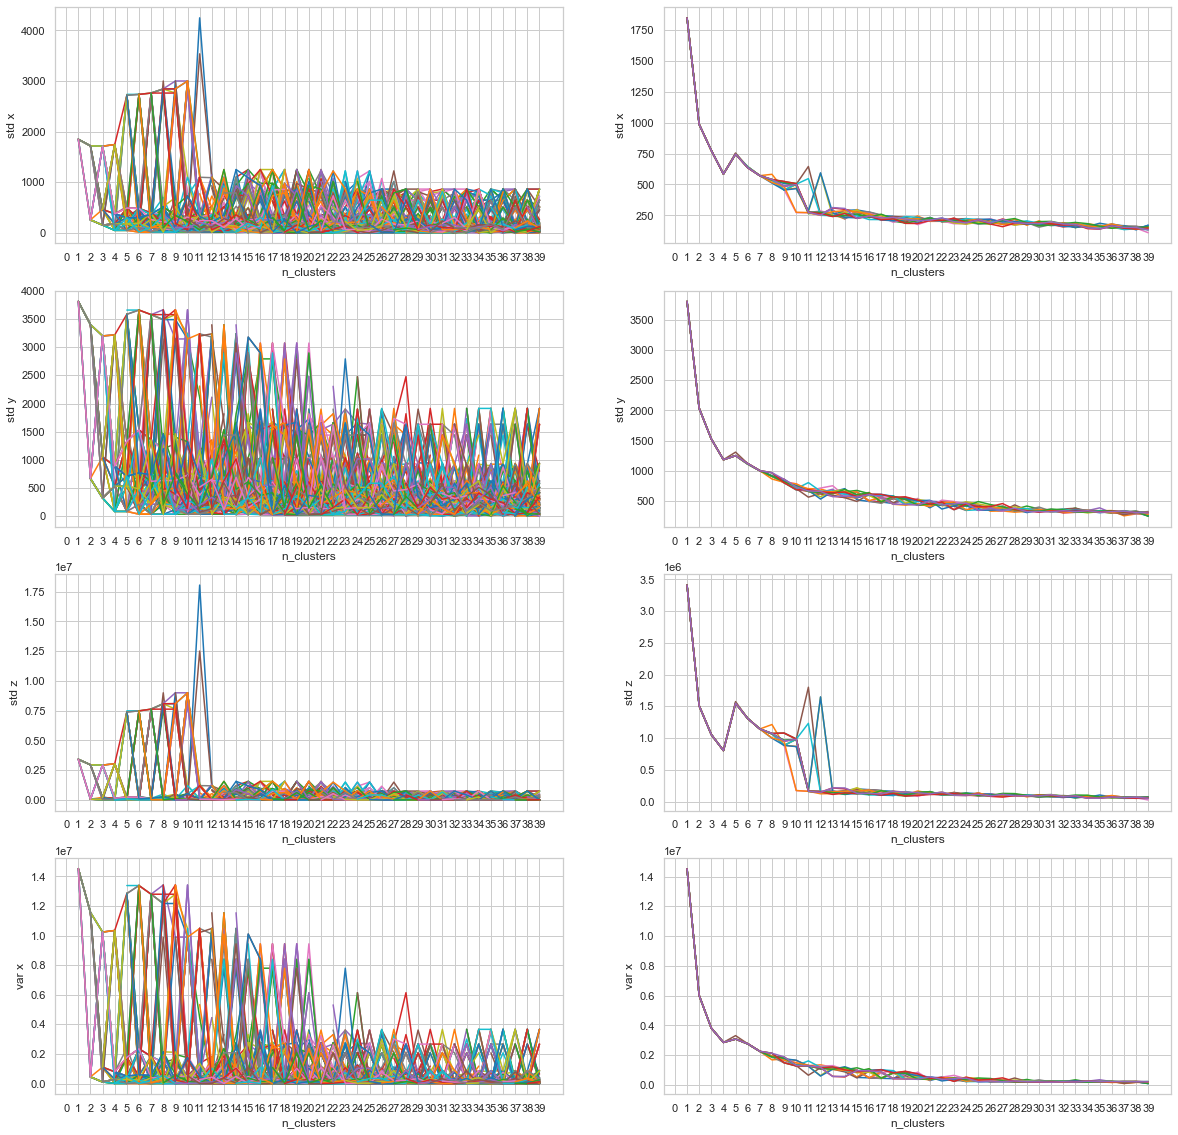

In [119]:
fig, axes = plt.subplots(4,2,figsize=(20,20))

for row in range(len(vars_pop)):
    
    for i, df in enumerate([vars_pop[row][j] for j in range(len(vars_pop[row]))]):
    
        df.set_index('n_clusters').plot(legend=[], ax=axes[i][0], xticks=range(n_clusters+1))
        df.set_index('n_clusters').mean(axis=1).plot(ax=axes[i][1], xticks=range(n_clusters+1))
        axes[i][0].set_ylabel(vars_names[i])
        axes[i][1].set_ylabel(vars_names[i])

plt.show()

In [120]:
import sys

['ij2', 'jk2', 'ki2', 'ji2', 'kj2', 'ik2']  scores


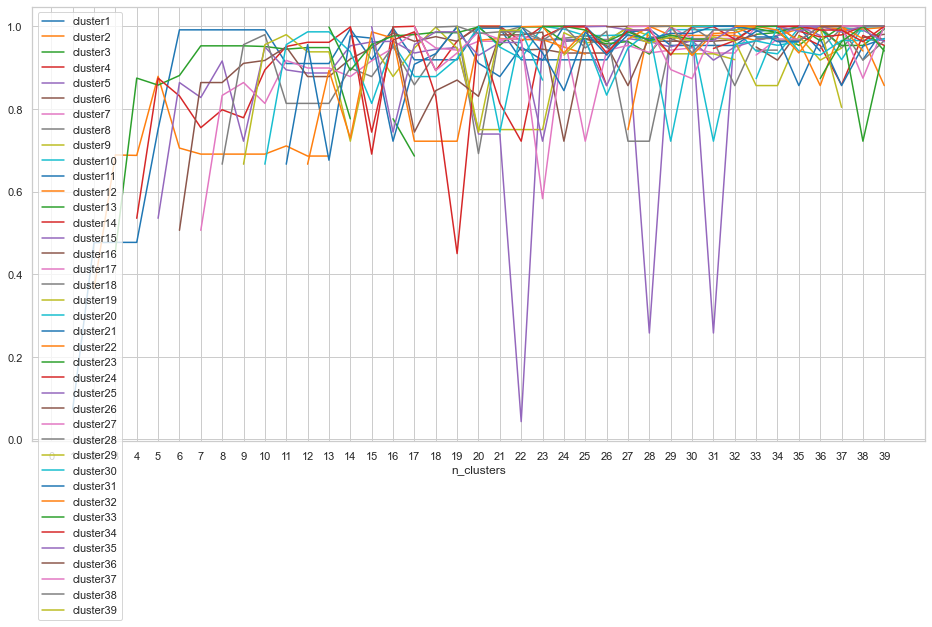

Press "Enter" for next prediction. "exit" to leave:  exit


SystemExit: 1

In [155]:
for scrs_df, name in zip(scrs_dfs[0], names):
    
    clear_output(wait=True)
    scrs_df.plot(x='n_clusters', figsize=(16,8), xticks=range(40))
    #plt.legend(loc='right')
    print(name, ' scores')
    plt.show()
    if input('Press "Enter" for next prediction. "exit" to leave: ')=='exit': sys.exit(1)

### Average Scores

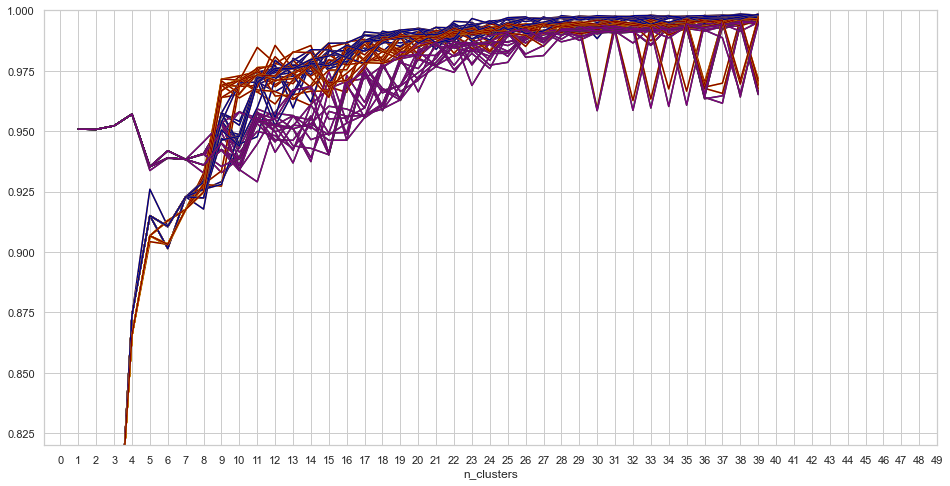

In [122]:
fig, ax0 = plt.subplots(1,1,figsize=(16,8))

for i in range(len(scrs_pop)):

    for scrs_df, color in zip(scrs_pop[i][:6], colors[:6]):
        
        scrs_df.set_index('n_clusters').mean(axis=1).plot(xticks=range(50), ylim=(0.82, 1), ax=ax0, color=color)
    
plt.show()

### Average of Averages

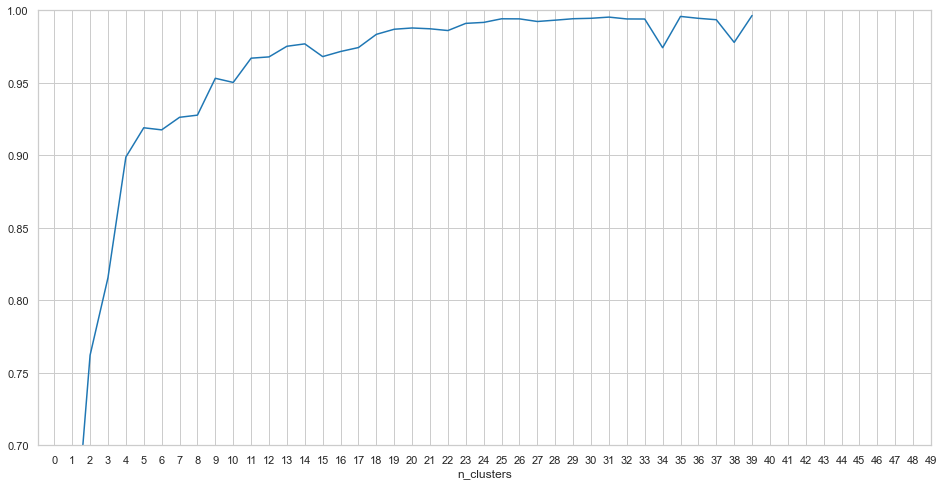

In [123]:
fig, ax0 = plt.subplots(1,1,figsize=(16,8))

pd.concat([scrs_df.set_index('n_clusters').mean(axis=1) for scrs_df in scrs_pop[row] for row in range(len(scrs_pop))], axis=1).mean(axis=1).plot(ylim=(0.7,1), xticks=range(50), ax=ax0)

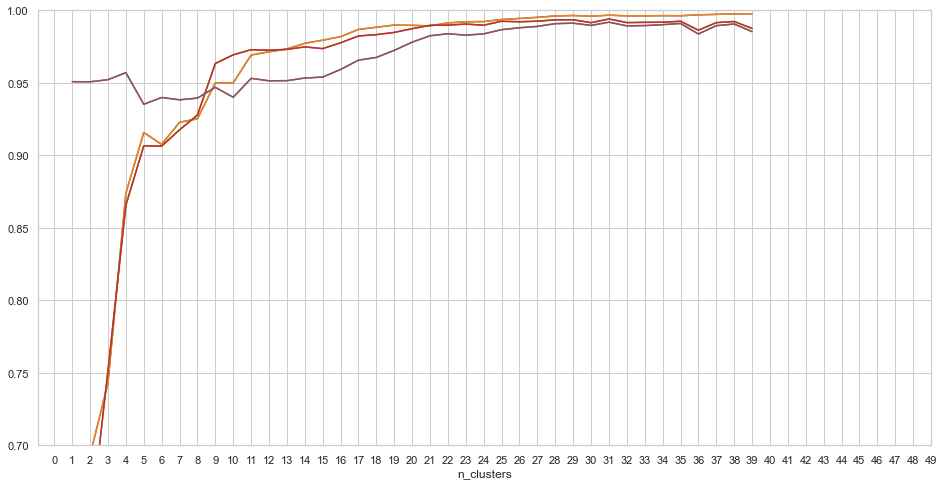

In [124]:
fig, ax0 = plt.subplots(1,1,figsize=(16,8))

for col in range(len(scrs_pop[0])):
    
    pd.concat([scrs_lst[col].set_index('n_clusters').mean(axis=1) for scrs_lst in scrs_pop], axis=1).mean(axis=1).plot(ylim=(0.7,1), xticks=range(50), ax=ax0)

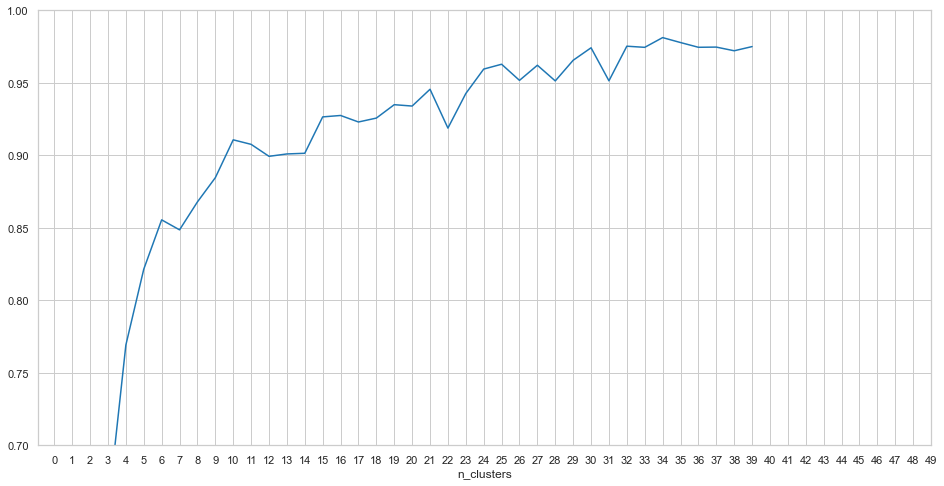

In [156]:
fig, ax0 = plt.subplots(1,1,figsize=(16,8))

pd.concat([scrs_df.set_index('n_clusters').mean(axis=1) for scrs_df in scrs_dfs[0]], axis=1).mean(axis=1).plot(ylim=(0.7,1), xticks=range(50), ax=ax0)

### Clustering

income_filt: 5

In [181]:
kmeans = KMeans(n_clusters=7, n_init=30).fit(pop_ss)
pop['cluster'] = kmeans.labels_

### Bar plot

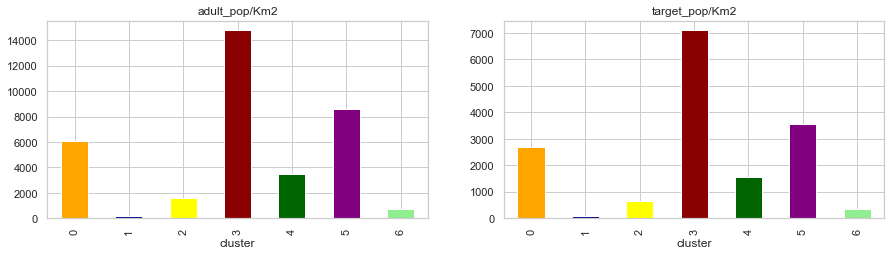

In [182]:
pop_mean = pop.groupby('cluster').mean()

fig = plt.figure(figsize=(15,8))
axes = [fig.add_subplot(2,2,i) for i in range(1, len(pop.columns))]

for i, col in enumerate(pop_mean):
    pop_mean[col].plot(kind='bar', ax=axes[i], title=pop.columns[i], color=[colors[j] for j in range(len(pop['cluster'].unique()))])

### Boxplot

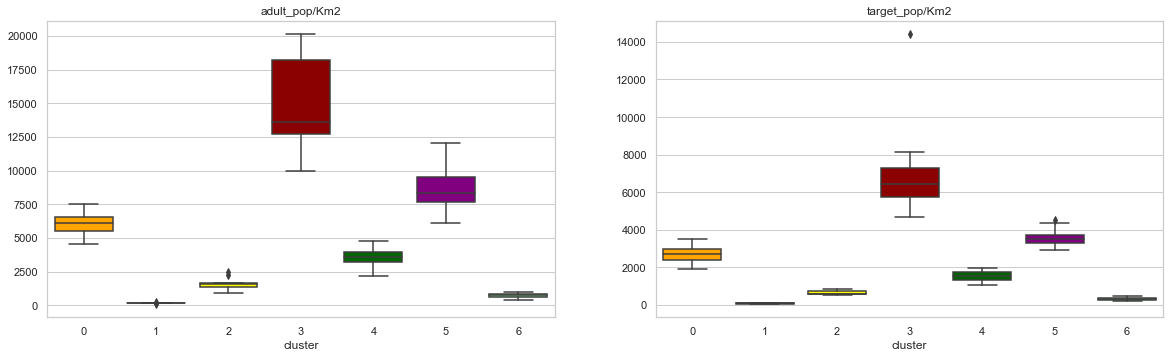

In [183]:
fig = plt.figure(figsize=(20,12))
axes=[fig.add_subplot(2,2,i+1) for i in range(len(pop.columns)-1)]

for i in range(len(pop.columns)-1):
    
    sns.boxplot(data=pop, x='cluster', y=pop.columns[i], ax=axes[i])
    axes[i].set_ylabel('')
    axes[i].set_title(pop.columns[i])
    
    #if i==len(income.columns)-3:
     #   axes[i].set_ylim(-10000000,1e9*0.2)
    
    for j in range(len(pop['cluster'].unique())):
        axes[i].artists[j].set_facecolor(colors[j])    # Setting colors to match clusters colors.

### 3D Scatter Plot

In [174]:
from IPython.display import clear_output

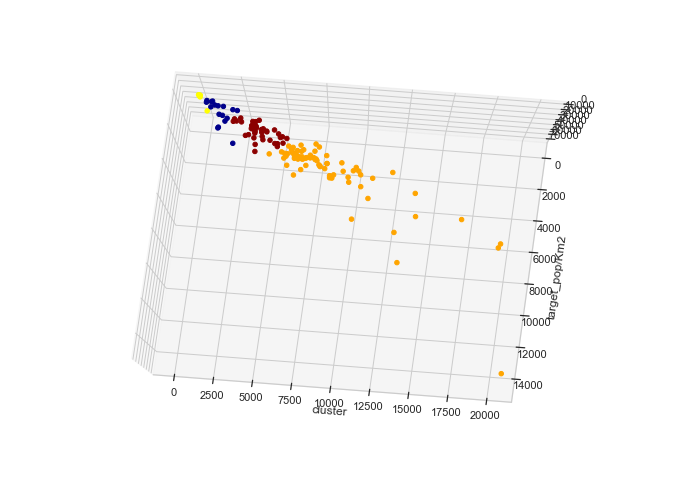

In [175]:
ys = pop['target_pop/Km2']
xs = pop['adult_pop/Km2']
zs = data['target pop']
zss = pop.iloc[:, 0]

for angle in range(0,270,12):
    
    fig = plt.figure(figsize=(12,9))
    ax0 = fig.add_subplot(111, projection='3d')


    ax0.scatter(xs, ys, zs=zs, c=[colors[cluster] for cluster in pop['cluster']], alpha=1)


    ax0.set_ylabel(pop.columns[1], fontsize=12)
    ax0.set_xlabel(pop.columns[2], fontsize=12)
    #ax0.set_zlabel(pop.columns[3], fontsize=12)

#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)

    ax0.view_init(angle,angle)
    plt.show()
    plt.pause(0.001)
    
    clear_output(wait=True)

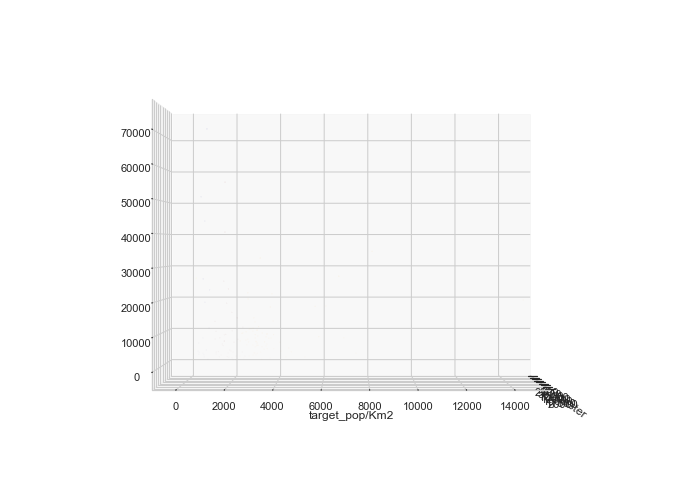

 exit


In [176]:
ys = pop['target_pop/Km2']
xs = pop['adult_pop/Km2']
zs = data['target pop']
zss = data['adult pop']

for angle in range(0,270,36):
    
    fig = plt.figure(figsize=(12,9))
    ax0 = fig.add_subplot(111, projection='3d')


    ax0.scatter(xs, ys, zs=zs, c=[colors[cluster] for cluster in pop['cluster']], alpha=1, s=zss/1e8)


    ax0.set_ylabel(pop.columns[1], fontsize=12)
    ax0.set_xlabel(pop.columns[2], fontsize=12)
    #ax0.set_zlabel(pop.columns[3], fontsize=12)

#ax0.set_zlim(-1000, 30000)
#ax0.set_xlim(-100, 4000)
#ax0.set_zlim(-1000, 30000)

    ax0.view_init(angle/5,angle)
    plt.show()
    plt.pause(0.001)
    if input()=='exit': break
    
    clear_output(wait=True)

In [162]:
pop.columns

Index(['adult_pop/Km2', 'target_pop/Km2', 'cluster', 'cluster_i'], dtype='object')

### 2D Scatter Plot

In [163]:
pop.columns

Index(['adult_pop/Km2', 'target_pop/Km2', 'cluster', 'cluster_i'], dtype='object')

In [177]:
pop_cols = data.columns.tolist()[-10:][:3]+data.columns.tolist()[-10:][-2:]

In [178]:
pop_cols

['target pop', 'Km2', 'target_pop/Km2', 'adult pop', 'adult_pop/Km2']

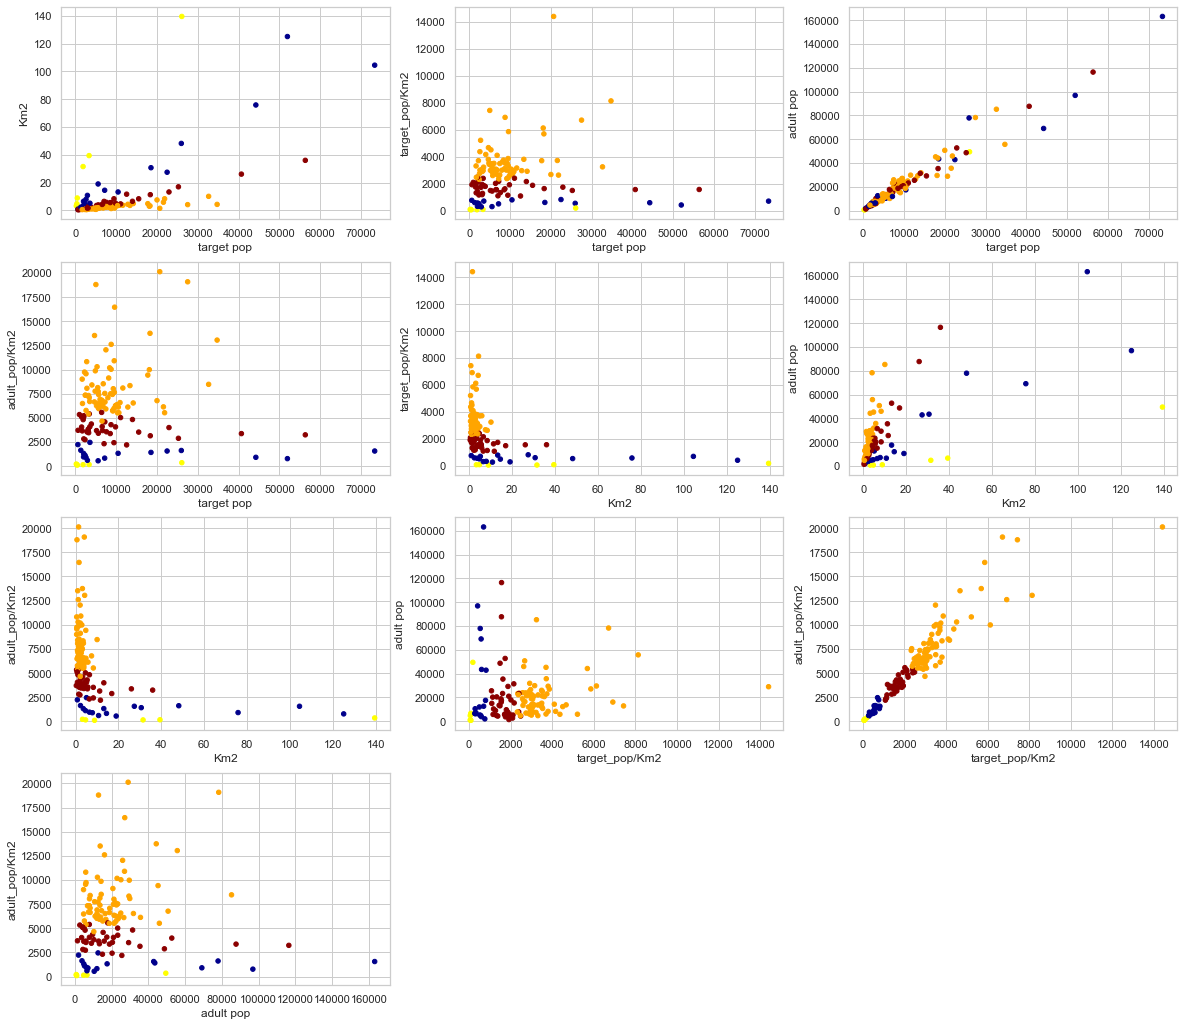

In [179]:
fig = plt.figure(figsize=(20,18))
axes = [fig.add_subplot(4,3,i) for i in range(1,11)]

cnt = 0
for i in range(5):
    for j in range(5):
        
        if i<j:
            data.plot.scatter(x=pop_cols[i], y=pop_cols[j], c=[colors[cluster] for cluster in pop['cluster']], alpha=1, ax=axes[cnt])
            cnt+=1


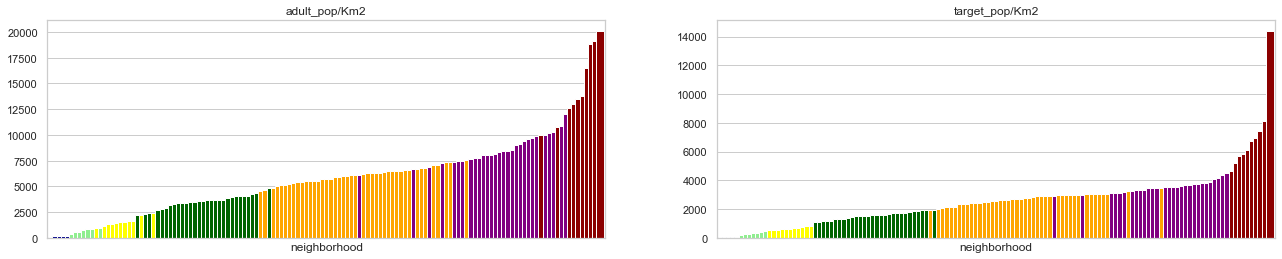

In [184]:
fig, axes = plt.subplots(1,2,figsize=(22,4))

for i, col in zip(range(4), pop.columns[:-1]):
    
    pop.sort_values(by=col)[col].plot.bar(color=[colors[cluster] for cluster in pop.sort_values(by=col)['cluster']], xticks=[], ax=axes[i], title=col, width=2)

# Selecting Neighborhoods for further clustering

#### Top: cluster 6

#### Maybe cluster only by demographic density and comparing, Use dbscan. Try a separate Notebook

In [185]:
pop['cluster_i'] = income['cluster']

In [186]:
pop_filt = pop[pop['cluster'].isin([5,3])]

In [187]:
filtered2 = pop_filt.loc[[i for i in pop_filt.index if i in filtered1.index]]

#### Checking

In [188]:
pop_filt.shape, income_filt.shape, filtered2.shape

((39, 4), (9, 4), (7, 4))

In [189]:
filtered2

adult_pop/Km2  target_pop/Km2  cluster  cluster_i
neighborhood                                                   
botafogo        9424.133413     3704.347492        5          0
catete         18799.555702     7432.894709        3          0
copacabana     19084.823078     6713.485947        3          0
flamengo       16458.582206     5859.364604        3          0
laranjeiras    10028.043344     3524.753967        5          0
leblon         12039.872193     3491.716204        5          0
leme            8059.770412     2932.872270        5          0

---
# Comerce

In [197]:
comerce = data[['neighborhood']+comerce_features].set_index('neighborhood').copy()

# Data Transformation

In [198]:
from sklearn.preprocessing import StandardScaler as ss, MinMaxScaler as mms

In [199]:
com_log = comerce.apply(np.log1p).fillna(0)

com_ss = ss().fit_transform(com_log)
com_mms = mms().fit_transform(com_log)

# KMeans

In [200]:
from sklearn.cluster import KMeans

In [201]:
colors = ['orange', 'darkblue', 'yellow', 'darkred', 'darkgreen', 'purple', 'lightgreen', 'pink', 'black', 'lightblue']     # Colors to differentiate clusters

### Optimization

inertia = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, n_init=30).fit(com_ss)
    inertia.append([i, kmeans.inertia_])
    
    if i in range(2,16,3): print(i)
    
inertia_df = pd.DataFrame(inertia, columns=['n_clusters', 'inertia'])

inertia_df.plot('n_clusters', 'inertia', xticks=np.linspace(1, 15, 15))

plt.show()

### Clustering

In [202]:
kmeans = KMeans(n_clusters=7, n_init=30).fit(com_ss)
comerce['cluster'] = kmeans.labels_

### Bar plot

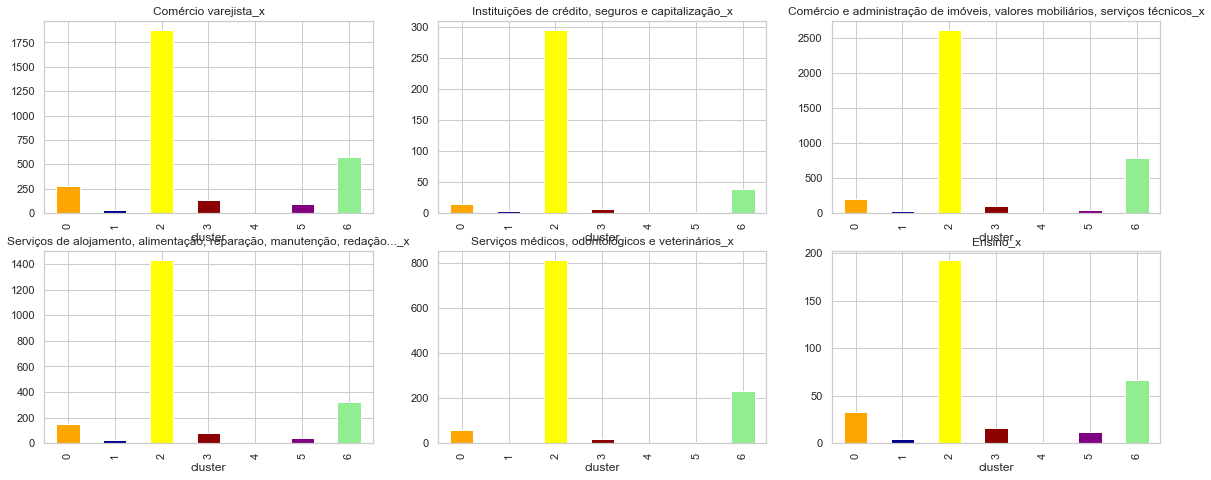

In [203]:
com_mean = comerce.groupby('cluster').mean()

fig = plt.figure(figsize=(20,12))
axes = [fig.add_subplot(3,3,i) for i in range(1, len(comerce.columns))]

for i, col in enumerate(com_mean):
    com_mean[col].plot(kind='bar', ax=axes[i], title=comerce.columns[i], color=[colors[j] for j in range(len(comerce['cluster'].unique()))])

### Boxplot

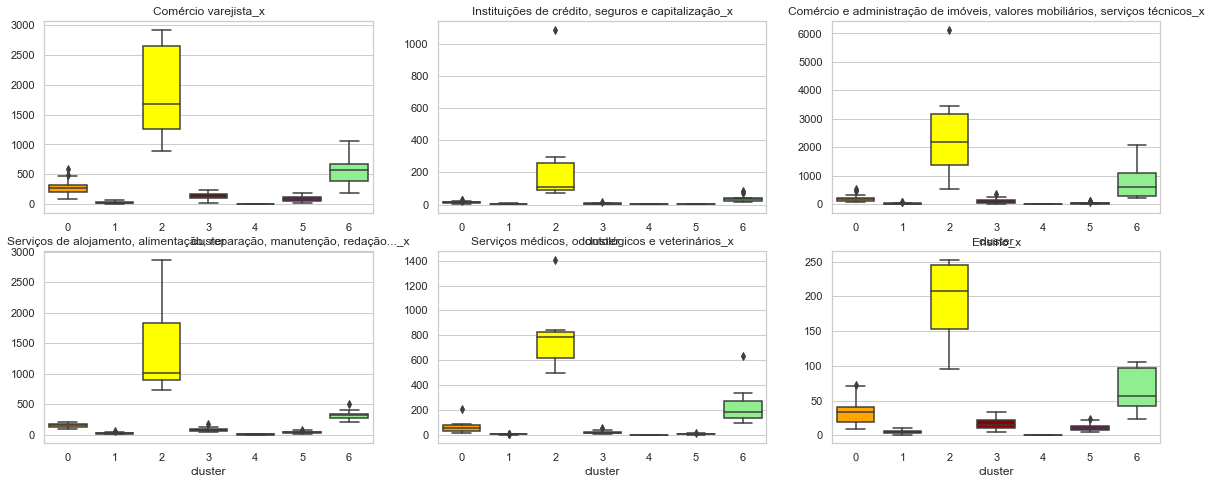

In [204]:
fig = plt.figure(figsize=(20,12))
axes=[fig.add_subplot(3,3,i+1) for i in range(len(comerce.columns)-1)]

for i in range(len(comerce.columns)-1):
    
    sns.boxplot(data=comerce, x='cluster', y=comerce.columns[i], ax=axes[i])
    axes[i].set_ylabel('')
    axes[i].set_title(comerce.columns[i])

    for j in range(len(comerce['cluster'].unique())):
        axes[i].artists[j].set_facecolor(colors[j])    # Setting colors to match clusters colors.

### 2D Scatter Plots

In [205]:
from IPython.display import clear_output
import time

### Relationship between variables

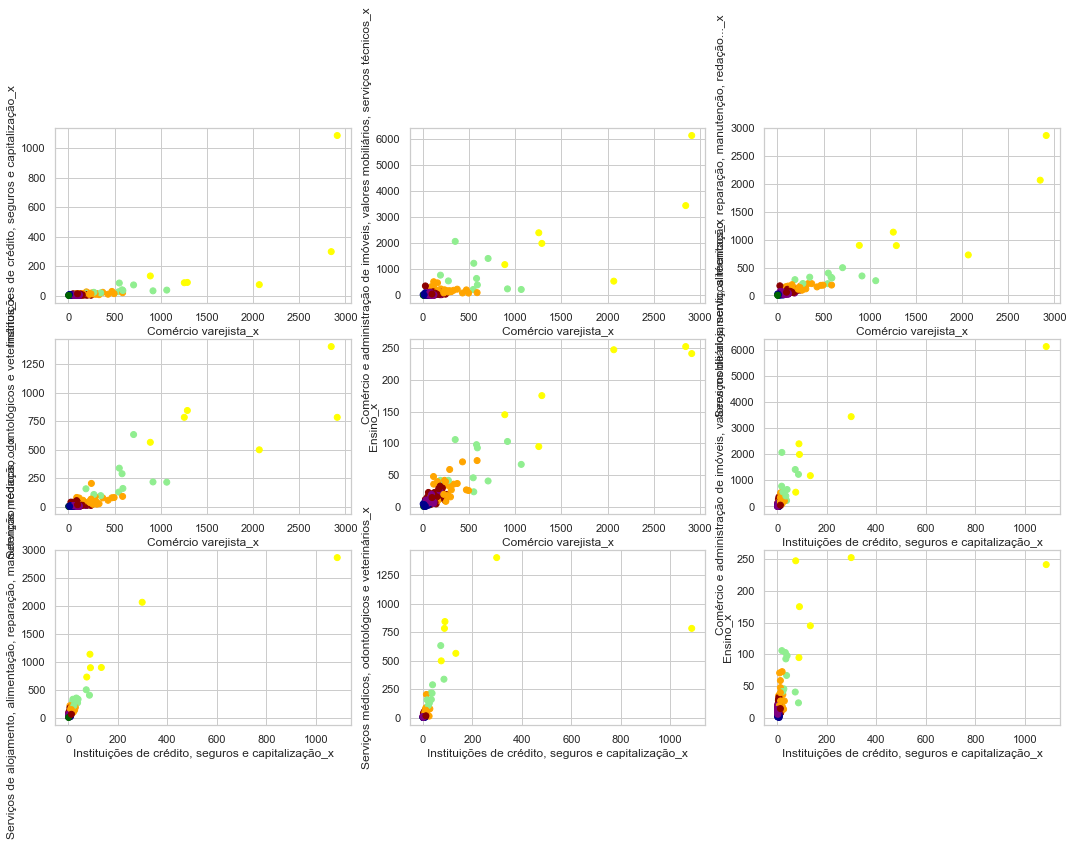

Press Enter to Plot Next 9 combinations. "exit" to leave: exit


In [206]:
fig = plt.figure(figsize=(18,11))
axes = [fig.add_subplot(3,3, i) for i in range(1, 10)]

cnt = 0
cnt_9 = 0
a=''
for i in range(6):
    for j in range(6):
        
        if i<j:
    
            axes[cnt].scatter(comerce.iloc[:, i], comerce.iloc[:, j], color=[colors[cluster] for cluster in comerce['cluster']])
            axes[cnt].set_ylabel(comerce.columns[j])
            axes[cnt].set_xlabel(comerce.columns[i])
            cnt+=1
            
            if cnt == 9:
                
                cnt_9+=1
                plt.show()
                if cnt_9==4: break
                
                a = input('Press Enter to Plot Next 9 combinations. "exit" to leave:')
                if a == 'exit': break
                clear_output()
                
                cnt = 0
                fig = plt.figure(figsize=(18,11))
                axes = [fig.add_subplot(3,3, i) for i in range(1, 10)]
                
                
    if a == 'exit': break 
                
                

### Relationship between variables: Zoom

# DO NOT RUN: Currently Bugging Computer

fig = plt.figure(figsize=(18,11))
axes = [fig.add_subplot(3,3, i) for i in range(1, 10)]

cnt = 0
cnt_9 = 0
a=''
for i in range(9):
    for j in range(9):
        
        if i<j:
            
            x = comerce.iloc[:, i]
            y = comerce.iloc[:, j]
            
            axes[cnt].scatter(x, y, color=[colors[cluster] for cluster in comerce['cluster']])
            
            axes[cnt].set_xlim(x.min()-(x.max()-x.min())/60, (x.max()-x.min())/3)
            axes[cnt].set_ylim(y.min()-(y.max()-y.min())/60, (y.max()-y.min())/3)

            xlabel = ((comerce.columns[i][:int(len(comerce.columns[i])/2)]+'\n'+comerce.columns[i][int(len(comerce.columns[i])/2):]) if len(comerce.columns[i])>47 else comerce.columns[i])
            ylabel = ((comerce.columns[j][:int(len(comerce.columns[j])/2)]+'\n'+comerce.columns[j][int(len(comerce.columns[j])/2):]) if len(comerce.columns[j])>47 else comerce.columns[j])
            
            axes[cnt].set_xlabel(xlabel)
            axes[cnt].set_ylabel(ylabel)
            
            cnt+=1
            
            if cnt == 9:
                
                cnt_9+=1
                plt.show()
                if cnt_9==4: break
                
                a = input('Press Enter to Plot Next 9 combinations. "exit" to leave')
                if a == 'exit': break
                clear_output()
                
                cnt = 0
                fig = plt.figure(figsize=(18,11))
                axes = [fig.add_subplot(3,3, i) for i in range(1, 10)]
                
    #if cnt_9==4: break
    if a == 'exit': break         

### Bar Plots

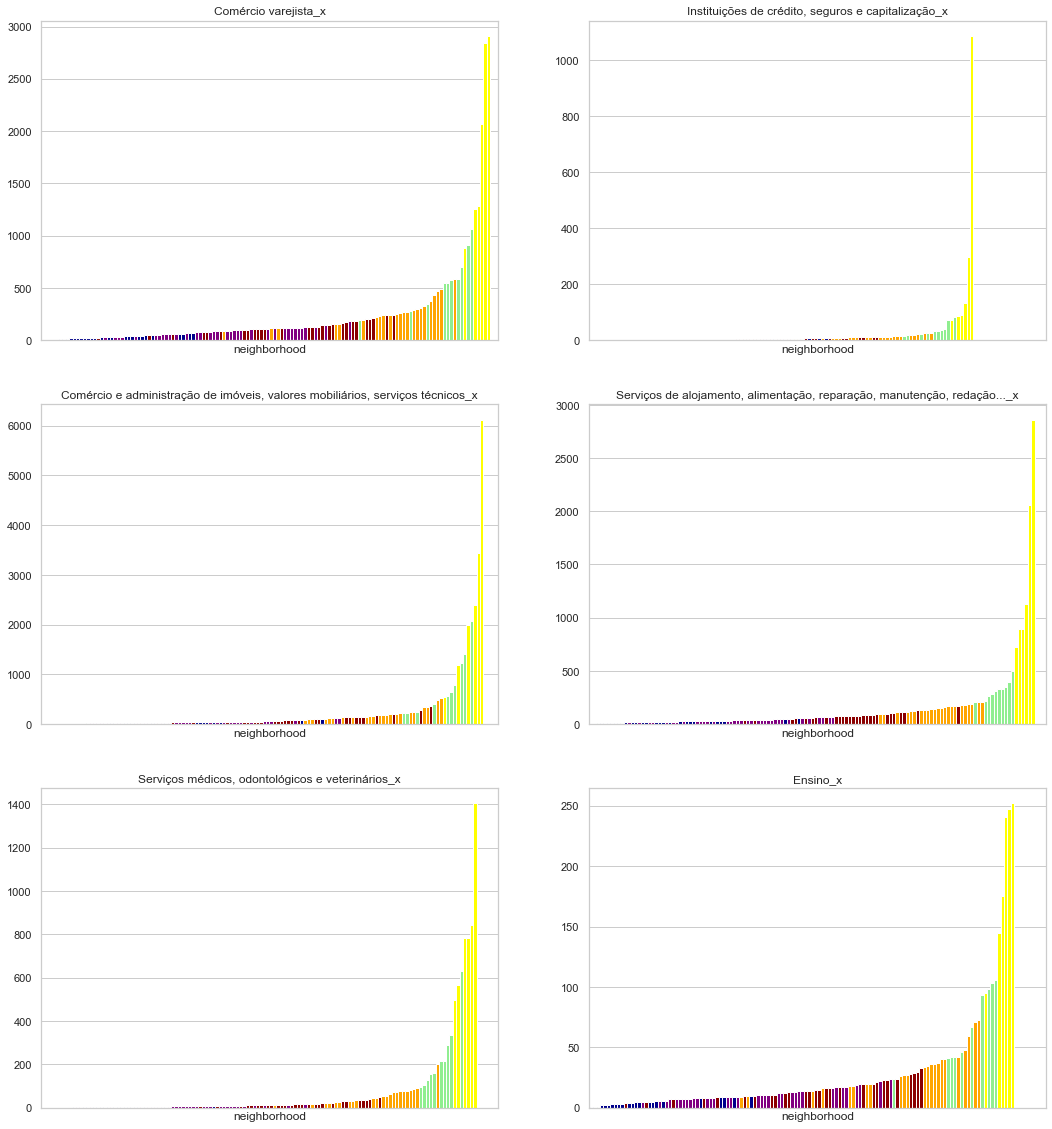

In [207]:
fig = plt.figure(figsize=(18,20))

axes = [fig.add_subplot(3,2,i) for i in range(1, len(comerce.columns))]

for i, col in enumerate(comerce.columns[:-1]):
    
    comerce.sort_values(by=col)[col].plot.bar(color=[colors[cluster] for cluster in comerce.sort_values(by=col)['cluster']], xticks=[], ax=axes[i], title=col, width=1)

### Bar Plots: Excluding Top 6 Comercial Neighborhoods

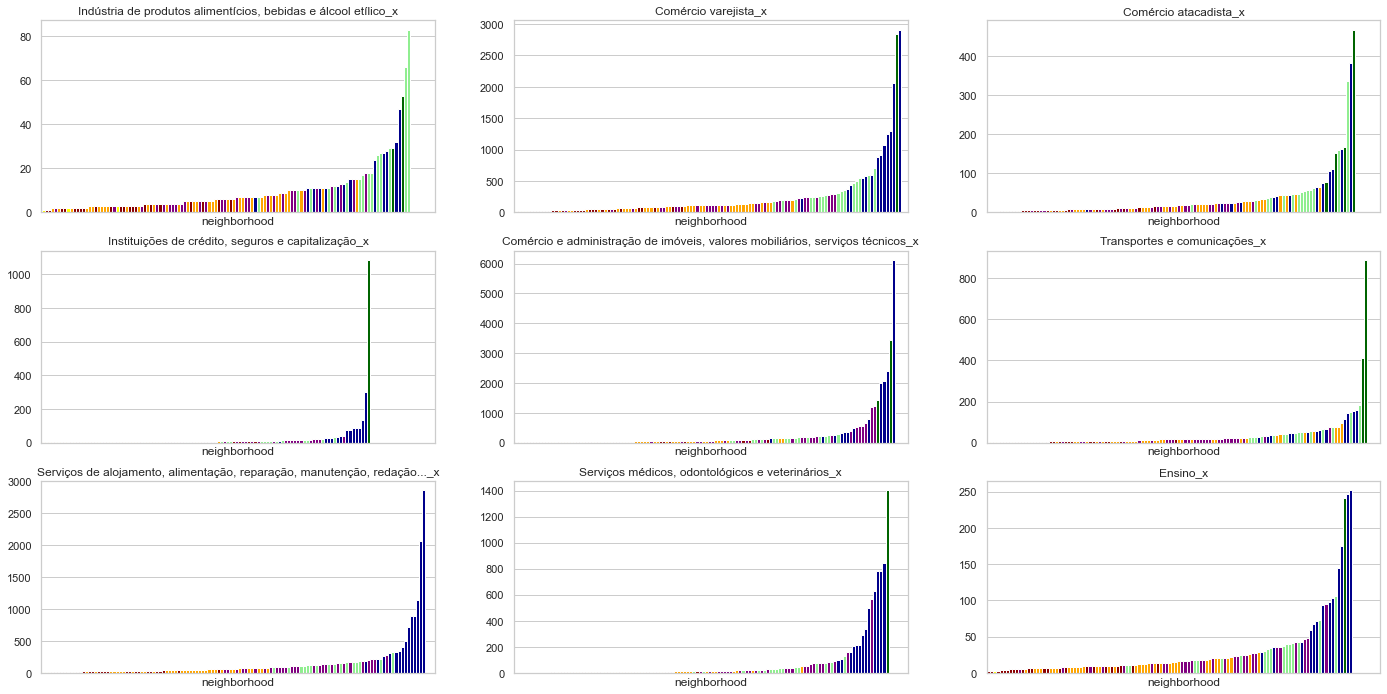

In [74]:
fig = plt.figure(figsize=(24,12))

axes = [fig.add_subplot(3,3,i) for i in range(1, len(comerce.columns))]

for i, col in enumerate(comerce.columns[:-1]):
    
    comerce.sort_values(by=col)[col].tail(-6).plot.bar(color=[colors[cluster] for cluster in comerce.sort_values(by=col)['cluster']], xticks=[], ax=axes[i], title=col, width=1)

# Filtering

#### Top cluster: 4

In [208]:
comerce['cluster_i'] = income['cluster'].copy()

In [209]:
comerce['cluster_j'] = pop['cluster'].copy()

In [210]:
com_filt = comerce[comerce['cluster'].isin([2,6])].copy()

### Third Filtering

In [211]:
filtered3 = com_filt.loc[[neighborhood for neighborhood in filtered2.index if neighborhood in com_filt.index]].copy()

In [212]:
filtered3.shape

(4, 9)

In [213]:
filtered3

Comércio varejista_x  \
neighborhood                         
botafogo                     887.0   
copacabana                  1255.0   
flamengo                     190.0   
leblon                       551.0   

              Instituições de crédito, seguros e capitalização_x  \
neighborhood                                                       
botafogo                                                  133.0    
copacabana                                                 87.0    
flamengo                                                   17.0    
leblon                                                     85.0    

              Comércio e administração de imóveis, valores mobiliários, serviços técnicos_x  \
neighborhood                                                                                  
botafogo                                                 1181.0                               
copacabana                                               2400.0                               
flamengo                                                  777.0                               
leblon                                                   1231.0                               

              Serviços de alojamento, alimentação, reparação, manutenção, redação..._x  \
neighborhood                                                                             
botafogo                                                  896.0                          
copacabana                                               1133.0                          
flamengo                                                  283.0                          
leblon                                                    400.0                          

              Serviços médicos, odontológicos e veterinários_x  Ensino_x  \
neighborhood                                                               
botafogo                                                 564.0     145.0   
copacabana                                               783.0      95.0   
flamengo                                                 156.0      42.0   
leblon                                                   337.0      24.0   

              cluster  cluster_i  cluster_j  
neighborhood                                 
botafogo            2          0          5  
copacabana          2          0          3  
flamengo            6          0          3  
leblon              6          0          5

In [214]:
filtered = pd.merge(income_filt.reset_index(), pop_filt.drop('cluster_i', axis=1).reset_index(), on='neighborhood')

filtered = pd.merge(filtered, com_filt.drop(['cluster_i', 'cluster_j'], axis=1).reset_index(), on='neighborhood')

filtered = filtered.set_index('neighborhood').rename(columns={'cluster_x':'cluster_inc', 'cluster_y':'cluster_pop', 'cluster':'cluster_com'})

In [215]:
filtered.shape, filtered3.shape

((4, 14), (4, 9))

### filtered

# Saving Loading Filtered Neighborhoods

In [1138]:
#income_filt.to_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/Final Capstone Project/rio dataframes/Filtered Neighborhoods/income_filtered.csv')

#pop_filt.to_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/Final Capstone Project/rio dataframes/Filtered Neighborhoods/population_filtered.csv')

#com_filt.to_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/Final Capstone Project/rio dataframes/Filtered Neighborhoods/comerce_filtered.csv')

In [1139]:
income_filt = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/Final Capstone Project/rio dataframes/Filtered Neighborhoods/income_filtered.csv', index_col=0)

pop_filt = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/Final Capstone Project/rio dataframes/Filtered Neighborhoods/population_filtered.csv', index_col=0)

com_filt = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/Final Capstone Project/rio dataframes/Filtered Neighborhoods/comerce_filtered.csv', index_col=0)

In [1140]:
#filtered.to_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/Final Capstone Project/rio dataframes/Filtered Neighborhoods/filtered_3.csv')

In [1141]:
filtered = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/Final Capstone Project/rio dataframes/Filtered Neighborhoods/filtered_3.csv', index_col=0)


# Exploratory Analysis

In [ ]:
filtered.loc['vila isabel']

In [1143]:
filtered

Valor do rendimento nominal médio mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$)  \
neighborhood                                                                                                                                     
botafogo                                            5146.563820                                                                                  
copacabana                                          5065.249035                                                                                  
flamengo                                            5492.289701                                                                                  
leblon                                              8407.644246                                                                                  
meier                                               3372.673739                                                                                  
tijuca                                              4172.251077                                                                                  
vila isabel                                         3096.927770                                                                                  

              Pessoas com rendimento responsáveis pelos domicílios particulares permanentes/Km2  \
neighborhood                                                                                      
botafogo                                            6757.094905                                   
copacabana                                         14778.886684                                   
flamengo                                           13234.899026                                   
leblon                                              8168.702393                                   
meier                                               6885.657746                                   
tijuca                                              5740.665065                                   
vila isabel                                         9002.756155                                   

              Valor do rendimento total mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$)/Km2  \
neighborhood                                                                                                                                 
botafogo                                           3.477582e+07                                                                              
copacabana                                         7.485874e+07                                                                              
flamengo                                           7.268990e+07                                                                              
leblon                                             6.867954e+07                                                                              
meier                                              2.322308e+07                                                                              
tijuca                                             2.395150e+07                                                                              
vila isabel                                        2.788089e+07                                                                              

              cluster_inc  adult_pop/Km2  target_pop/Km2  cluster_pop  \
neighborhood                                                            
botafogo                0    9424.133413        3.704347            5   
copacabana              0   19084.823078        6.713486            4   
flamengo                0   16458.582206        5.859365            4   
leblon                  0   12039.872193        3.491716            5   
meier                   0   10906.810641        3.863722            5   
tijuca           

In [217]:
filtered

Valor do rendimento nominal médio mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$)  \
neighborhood                                                                                                                                     
botafogo                                            5146.563820                                                                                  
copacabana                                          5065.249035                                                                                  
flamengo                                            5492.289701                                                                                  
leblon                                              8407.644246                                                                                  

              Pessoas com rendimento responsáveis pelos domicílios particulares permanentes/Km2  \
neighborhood                                                                                      
botafogo                                            6757.094905                                   
copacabana                                         14778.886684                                   
flamengo                                           13234.899026                                   
leblon                                              8168.702393                                   

              Valor do rendimento total mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$)/Km2  \
neighborhood                                                                                                                                 
botafogo                                           3.477582e+07                                                                              
copacabana                                         7.485874e+07                                                                              
flamengo                                           7.268990e+07                                                                              
leblon                                             6.867954e+07                                                                              

              cluster_inc  adult_pop/Km2  target_pop/Km2  cluster_pop  \
neighborhood                                                            
botafogo                0    9424.133413     3704.347492            5   
copacabana              0   19084.823078     6713.485947            3   
flamengo                0   16458.582206     5859.364604            3   
leblon                  0   12039.872193     3491.716204            5   

              Comércio varejista_x  \
neighborhood                         
botafogo                     887.0   
copacabana                  1255.0   
flamengo                     190.0   
leblon                       551.0   

              Instituições de crédito, seguros e capitalização_x  \
neighborhood                                                       
botafogo                                                  133.0    
copacabana                                                 87.0    
flamengo                                                   17.0    
leblon                                                     85.0    

              Comércio e administração de imóveis, valores mobiliários, serviços técnicos_x  \
neighborhood                                                                                  
botafogo                                                 1181.0                               
copacabana                                               2400.0                               
flamengo                                                  777.0                               
leblon                                                   1231.0                               

              Serviços de alojamento, ali

In [1144]:
filtered[(filtered['cluster_inc']==6) & (filtered['cluster_pop']==6) & (filtered['cluster_com']==5)]

Empty DataFrame
Columns: [Valor do rendimento nominal médio mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$), Pessoas com rendimento responsáveis pelos domicílios particulares permanentes/Km2, Valor do rendimento total mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$)/Km2, cluster_inc, adult_pop/Km2, target_pop/Km2, cluster_pop, Comércio varejista_x, Instituições de crédito, seguros e capitalização_x, Comércio e administração de imóveis, valores mobiliários, serviços técnicos_x, Serviços de alojamento, alimentação, reparação, manutenção, redação..._x, Serviços médicos, odontológicos e veterinários_x, Ensino_x, cluster_com]
Index: []